In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import math as m


In [2]:
# onsets arrival vector
AV = [0,20,0,0,0,0]

# increment vector
IV = [30,45,60,40,40,40]

# duration of ones
duration = [15,20,25,15,20,25]

# Question 1.1

In [3]:
# copying a list
IV_copy = IV.copy()
duration_copy = duration.copy()

In [4]:
tc_list = []

for i in AV:
    
    tc = []
    
    #### added
    n = 0
    if i != 0:
        while n < i:
            tc.append(0)
            n = n + 1
    #### added
    

    
    for j in IV_copy:
        
        N = 220
        
        
        for k in duration_copy:

            while n < N: 

                count_ones = 0

                while count_ones < k and n < N:

                    count_ones = count_ones + 1
                    tc.append(1)
                    n = n + 1
                #print(n)
                if n < N and count_ones == k:

                    count_negative_ones = 0
                    while count_negative_ones < (j - k) and n < N:

                        count_negative_ones = count_negative_ones + 1
                        tc.append(0) 
                        n = n + 1 
                #print(n)
                    
        last_twenty = 0
        while last_twenty < 20:
            tc.append(0)
            last_twenty = last_twenty + 1
        
        tc_list.append(tc)
        #print(n)
        IV_copy.pop(0)
        duration_copy.pop(0)
        #print(IV_copy)
        #print(duration_copy)
        
        
        break
            
            
 ### all okay till here           
     

In [5]:
tc_stand_list = []

for tc in tc_list:
    
    tc_mean = st.mean(tc)
    #print(tc_mean)
    
    tc_stand_dev = st.stdev(tc)
    #print(tc_stand_dev)
    
    tc = [i - tc_mean for i in tc]
    
    tc = [i / tc_stand_dev for i in tc]
    
    #print(tc)
    
    tc_stand_list.append(tc)


In [6]:
interval = []
N=240
i=0
while i < N:
    interval.append(i)
    i=i+1
#print(interval)

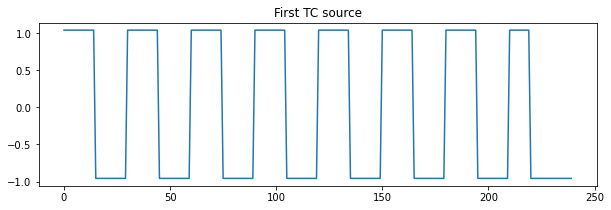

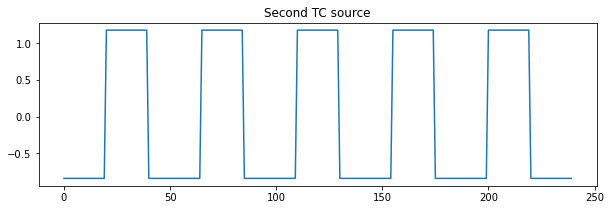

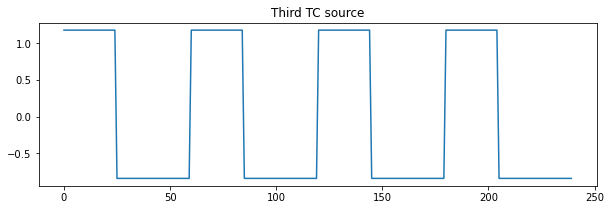

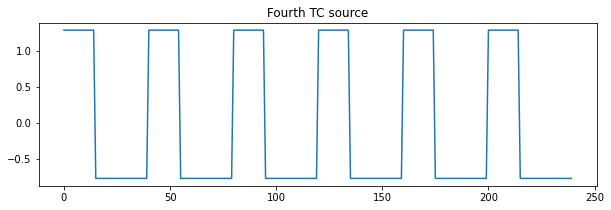

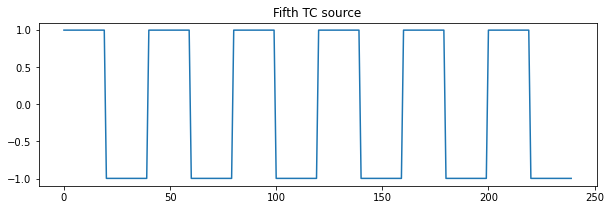

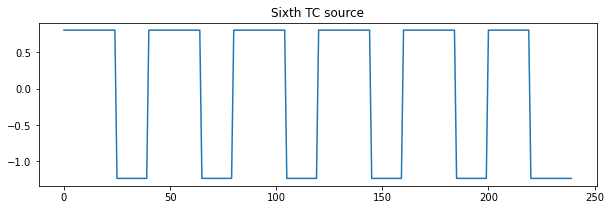

In [7]:
title = ["First TC source", "Second TC source", "Third TC source", "Fourth TC source", "Fifth TC source", "Sixth TC source"]

for i in range(6):
    
    plt.figure(figsize=(10,3))
    
    plt.plot(interval, tc_stand_list[i])

    # title of each subplots
    plt.gca().set_title(title[i]) 
    
    plt.savefig("1.1_TC_Plot{}.png".format(i), bbox_inches='tight')
    
    plt.show()


# Question 1.2

In [8]:
# Create the pandas DataFrame
df = pd.DataFrame(tc_list)

In [9]:
#df

In [10]:
# transpose of dataframe
df = df.transpose()

In [11]:
#df

In [12]:
df.corr()

,0,1,2,3,4,5
0,1.000000,3.524537e-02,2.044231e-01,0.118444,4.170288e-02,0.094160
1,0.035245,1.000000e+00,-2.857143e-02,0.130931,-6.708914e-17,-0.093612
2,0.204423,-2.857143e-02,1.000000e+00,0.043644,-9.711506e-17,0.165622
3,0.118444,1.309307e-01,4.364358e-02,1.000000,7.745967e-01,0.626980
4,0.041703,-6.708914e-17,-9.711506e-17,0.774597,1.000000e+00,0.809427
5,0.094160,-9.361243e-02,1.656220e-01,0.626980,8.094272e-01,1.000000


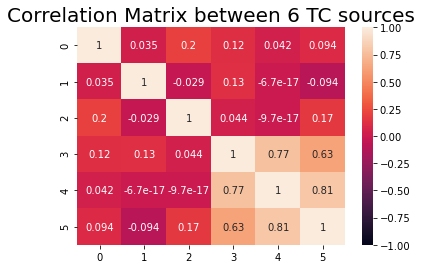

In [13]:

plt.title("Correlation Matrix between 6 TC sources", fontsize =20)

sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

plt.savefig("1.2_CM.png", bbox_inches='tight')

In [83]:
# 5th tc with 6th tc

# Question 1.3

In [14]:
### extra and works
tmpSM = np.arange(2646).reshape(6, 21, 21)     #2646

In [15]:
tmpSM[tmpSM > 0] = 0

In [16]:
vertical_start = [2,2,8,8,15,15]
vertical_end = [6,6,13,13,19,19]       # may not keep it if not used              


horizontal_start = [2,15,2,15,2,15]
horizontal_end = [6,19,6,19,6,19]

In [17]:
b = tmpSM                    # delete once complete
surv = tmpSM


In [18]:
tmpSM = surv  #delete once complete

In [19]:

tmpSM[0][1:6, 1:6] = 1
tmpSM[1][1:6, 14:19] = 1
tmpSM[2][7:13, 1:6] = 1
tmpSM[3][8:13, 15:19] = 1
tmpSM[4][14:19, 1:6] = 1
tmpSM[5][14:19, 14:19] = 1


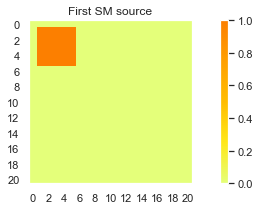

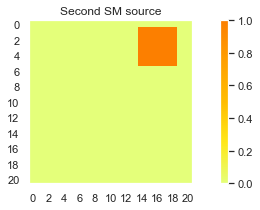

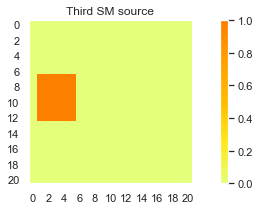

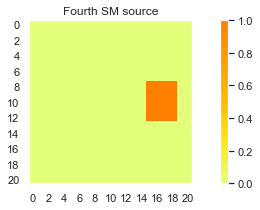

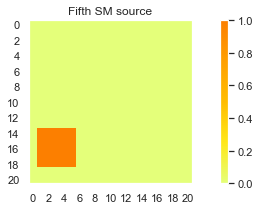

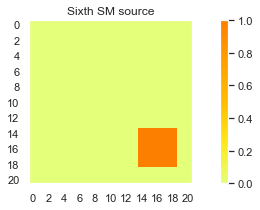

In [225]:
title = ["First SM source", "Second SM source", "Third SM source", "Fourth SM source", "Fifth SM source", "Sixth SM source"]

j = 0

for i in tmpSM:
    
    plt.figure(figsize=(10,3))
    
    plt.grid(None)
    
    plt.imshow(i, interpolation='nearest', cmap="Wistia")
    
    plt.yticks(np.arange(0, 21, 2))
    plt.xticks(np.arange(0, 21, 2))
    
    #plt.grid(None)
    
    plt.colorbar()
    
    # title of each subplots
    plt.gca().set_title(title[j]) 
    
    plt.savefig("1.3_SM_Plot{}.png".format(j), bbox_inches='tight')
    
    j = j + 1
    
    plt.show()

In [23]:
temp_final = tmpSM

In [24]:
SM = temp_final.reshape((6, 441))

In [25]:
# Create the pandas DataFrame
df_SM = pd.DataFrame(SM)
df_SM

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# transpose of dataframe
df_SM = df_SM.transpose()
df_SM

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
436,0,0,0,0,0,0
437,0,0,0,0,0,0
438,0,0,0,0,0,0
439,0,0,0,0,0,0


In [27]:
df_SM.corr()

,0,1,2,3,4,5
0,1.000000,-0.060096,-0.066231,-0.053431,-0.060096,-0.060096
1,-0.060096,1.000000,-0.066231,-0.053431,-0.060096,-0.060096
2,-0.066231,-0.066231,1.000000,-0.058886,-0.066231,-0.066231
3,-0.053431,-0.053431,-0.058886,1.000000,-0.053431,-0.053431
4,-0.060096,-0.060096,-0.066231,-0.053431,1.000000,-0.060096
5,-0.060096,-0.060096,-0.066231,-0.053431,-0.060096,1.000000


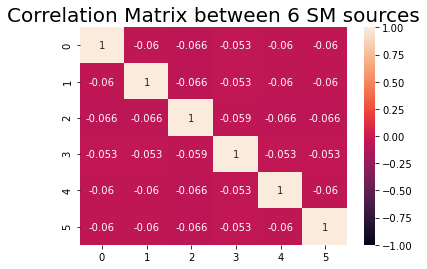

In [28]:
plt.title("Correlation Matrix between 6 SM sources", fontsize =20)
sns.heatmap(df_SM.corr(), vmin=-1, vmax=1, annot=True)

plt.savefig("1.3_CM.png", bbox_inches='tight')

In [202]:
latter = tmpSM ###extra must delete

In [203]:
latter[0] ###extra must delete

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Question 1.4

In [29]:
###noise variance 0:25 for temporal # take sqrt to obtain sigma
###noise variance 0.015 for spatial # take sqrt to obtain sigma

# Generate zero mean white Gaussian noise with the same dimension as the TC 
TC_noise = np.random.normal(0, m.sqrt(0.25), [240,6]) 
print(TC_noise)

# Generate zero mean white Gaussian noise with the same dimension as the SM
SM_noise = np.random.normal(0, m.sqrt(0.015), [6,441]) 
print(SM_noise)

[[ 0.63525459  0.25456036 -0.18790729 -0.22129181  0.5276245   0.38078619]
 [-0.5774036  -1.00066775  0.02358345  0.05976092 -0.09125727  0.68822765]
 [ 0.60061577  0.20272768  1.14172653  0.34688824  0.43904579  0.44004707]
 ...
 [ 0.01935806 -0.96176375 -0.4264866   0.51109802  0.03131298 -0.01256491]
 [-0.00544724  1.07515205  0.90363799  1.48956287 -0.11062148 -0.13953389]
 [ 0.40295114 -0.26601494 -0.84158655  0.39212386 -1.19153717 -0.02936431]]
[[ 0.07754408 -0.11150314 -0.18707381 ...  0.10664454  0.08982631
  -0.0017314 ]
 [-0.16361888 -0.17524592 -0.05721659 ...  0.06517746  0.08390918
  -0.05947361]
 [ 0.05710591 -0.05250753 -0.08842267 ... -0.12317084 -0.15472485
   0.03319098]
 [ 0.18000447  0.04451243  0.09746058 ...  0.02184    -0.06983318
   0.14013537]
 [-0.16070412  0.12707146 -0.2129709  ...  0.0572761   0.02664626
  -0.30394185]
 [-0.00413048 -0.26091988 -0.05040863 ... -0.07373987  0.02975151
  -0.01214925]]


In [32]:
# Create the pandas DataFrame
df_TC_noise = pd.DataFrame(TC_noise)
df_TC_noise


,0,1,2,3,4,5
0,0.635255,0.254560,-0.187907,-0.221292,0.527624,0.380786
1,-0.577404,-1.000668,0.023583,0.059761,-0.091257,0.688228
2,0.600616,0.202728,1.141727,0.346888,0.439046,0.440047
3,0.359299,-0.084470,0.651930,-0.755048,-0.727990,-1.180305
4,-0.266754,0.444907,-0.180522,-0.029413,0.279471,0.350241
...,...,...,...,...,...,...
235,-1.011482,0.963707,-0.255716,0.687575,-0.297509,-0.085591
236,0.188480,-0.144587,-0.447195,-0.511815,-1.012448,0.770627
237,0.019358,-0.961764,-0.426487,0.511098,0.031313,-0.012565
238,-0.005447,1.075152,0.903638,1.489563,-0.110621,-0.139534


In [33]:
df_TC_noise.corr()

,0,1,2,3,4,5
0,1.000000,-0.022973,-0.058153,0.046186,0.094974,-0.069156
1,-0.022973,1.000000,0.067471,0.022363,0.075515,-0.020627
2,-0.058153,0.067471,1.000000,0.042831,0.038508,-0.091186
3,0.046186,0.022363,0.042831,1.000000,0.037164,0.005205
4,0.094974,0.075515,0.038508,0.037164,1.000000,0.085744
5,-0.069156,-0.020627,-0.091186,0.005205,0.085744,1.000000


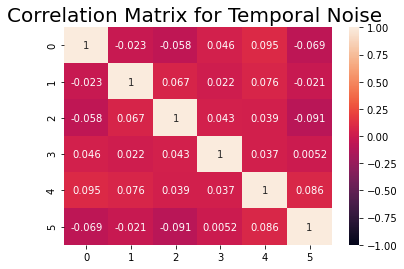

In [34]:
plt.title("Correlation Matrix for Temporal Noise ", fontsize =20)

sns.heatmap(df_TC_noise.corr(), vmin=-1, vmax=1, annot=True)

plt.savefig("1.4_CM_Temporal.png", bbox_inches='tight')

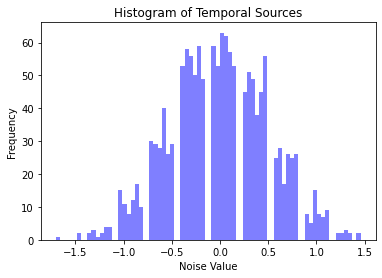

In [35]:
plt.title("Histogram of Temporal Sources")

plt.hist(df_TC_noise, facecolor='blue', alpha=0.5)

plt.xlabel('Noise Value')

plt.ylabel('Frequency')

plt.savefig("1.4_Hist_Temporal.png", bbox_inches='tight')

plt.show()

In [ ]:
from scipy.stats import norm

In [281]:
criteria_TC_noise = norm.cdf(1.96 * df_TC_noise.std(axis = 0), df_TC_noise.mean(axis = 0), df_TC_noise.std(axis = 0)) - norm.cdf(-1.96 * df_TC_noise.std(axis = 0), df_TC_noise.mean(axis = 0), df_TC_noise.std(axis = 0))

Fraction of values satisfying criteria = [0.94997278 0.94999972 0.949201   0.94967583 0.94939519 0.94985524]


In [283]:
print("Fraction of values satisfying criteria =", criteria_TC_noise)

Fraction of values satisfying criteria = [0.94997278 0.94999972 0.949201   0.94967583 0.94939519 0.94985524]


In [39]:
# Create the pandas DataFrame
df_SM_noise = pd.DataFrame(SM_noise)
df_SM_noise


,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.077544,-0.111503,-0.187074,0.031170,0.049530,-0.020040,-0.131619,0.061929,0.180266,0.047382,...,0.111602,-0.064616,0.181436,-0.065060,-0.164727,-0.051360,-0.112228,0.106645,0.089826,-0.001731
1,-0.163619,-0.175246,-0.057217,-0.080185,-0.079623,-0.083835,0.169587,0.140464,-0.056777,0.090587,...,0.074214,0.108404,0.077848,0.134547,0.108872,-0.179206,0.163302,0.065177,0.083909,-0.059474
2,0.057106,-0.052508,-0.088423,-0.034477,0.075958,0.156314,-0.024072,0.045303,0.092314,-0.085771,...,-0.039820,-0.077526,-0.076871,-0.375649,0.034823,-0.007686,0.123390,-0.123171,-0.154725,0.033191
3,0.180004,0.044512,0.097461,-0.089084,0.113699,-0.235190,-0.004586,-0.106451,0.206947,-0.013521,...,0.234013,-0.134376,-0.255602,0.178788,-0.045920,-0.152398,0.214598,0.021840,-0.069833,0.140135
4,-0.160704,0.127071,-0.212971,0.121495,0.077553,-0.003138,0.094259,0.136298,-0.100392,-0.009397,...,-0.008903,-0.205273,0.272785,-0.052042,0.172673,0.055807,-0.041471,0.057276,0.026646,-0.303942
5,-0.004130,-0.260920,-0.050409,-0.130858,0.005255,0.201141,0.020438,0.137014,0.075097,-0.075738,...,-0.053314,0.176791,0.085475,0.056744,0.104673,-0.037272,-0.153270,-0.073740,0.029752,-0.012149


In [40]:
# transpose of dataframe
df_SM_noise = df_SM_noise.transpose()
df_SM_noise

,0,1,2,3,4,5
0,0.077544,-0.163619,0.057106,0.180004,-0.160704,-0.004130
1,-0.111503,-0.175246,-0.052508,0.044512,0.127071,-0.260920
2,-0.187074,-0.057217,-0.088423,0.097461,-0.212971,-0.050409
3,0.031170,-0.080185,-0.034477,-0.089084,0.121495,-0.130858
4,0.049530,-0.079623,0.075958,0.113699,0.077553,0.005255
...,...,...,...,...,...,...
436,-0.051360,-0.179206,-0.007686,-0.152398,0.055807,-0.037272
437,-0.112228,0.163302,0.123390,0.214598,-0.041471,-0.153270
438,0.106645,0.065177,-0.123171,0.021840,0.057276,-0.073740
439,0.089826,0.083909,-0.154725,-0.069833,0.026646,0.029752


In [41]:
df_SM_noise.corr()

,0,1,2,3,4,5
0,1.000000,0.036514,0.037375,0.047262,0.013118,0.037292
1,0.036514,1.000000,0.006544,-0.024171,0.012225,0.053778
2,0.037375,0.006544,1.000000,0.047041,-0.125109,-0.016972
3,0.047262,-0.024171,0.047041,1.000000,-0.015899,-0.019953
4,0.013118,0.012225,-0.125109,-0.015899,1.000000,-0.007380
5,0.037292,0.053778,-0.016972,-0.019953,-0.007380,1.000000


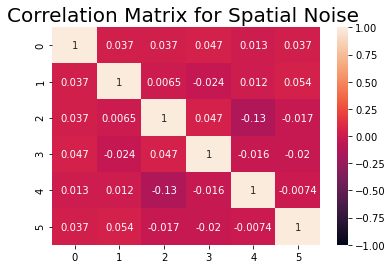

In [42]:
plt.figure(figsize=(10,5))

plt.title("Correlation Matrix for Spatial Noise ", fontsize =20)

sns.heatmap(df_SM_noise.corr(), vmin=-1, vmax=1, annot=True)

plt.savefig("1.4_CM_spatial.png", bbox_inches='tight')

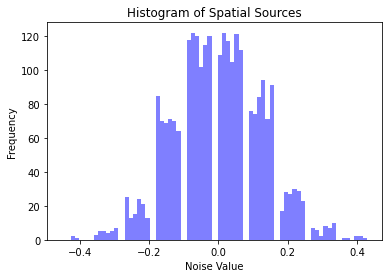

In [43]:
plt.figure(figsize=(10,5))

plt.title("Histogram of Spatial Sources")

plt.hist(df_SM_noise, facecolor='blue', alpha=0.5)

plt.xlabel('Noise Value')

plt.ylabel('Frequency')

plt.savefig("1.4_Hist_Spatial.png", bbox_inches='tight')

plt.show()

In [286]:
criteria_SM_noise = norm.cdf(1.96 * df_SM_noise.std(axis = 0), df_SM_noise.mean(axis = 0), df_SM_noise.std(axis = 0)) - norm.cdf(-1.96 * df_SM_noise.std(axis = 0), df_SM_noise.mean(axis = 0), df_SM_noise.std(axis = 0))

In [287]:
print("Fraction of values satisfying criteria =", criteria_SM_noise)

Fraction of values satisfying criteria = [0.94849766 0.95000411 0.94987881 0.94986313 0.94999326 0.94989957]


In [48]:
df_SM_noise_t =  df_SM_noise.transpose()
np_SM_noise = df_SM_noise_t.to_numpy()
np_TC_noise = df_TC_noise.to_numpy()

prod = np.matmul(np_TC_noise, np_SM_noise)
prod

array([[-0.12931904, -0.1477359 , -0.26992011, ...,  0.10479086,
         0.14833814, -0.21848057],
       [ 0.1428806 ,  0.04999858,  0.15375344, ..., -0.18437422,
        -0.12560933,  0.08904586],
       [ 0.06867081, -0.20603298, -0.3067916 , ..., -0.06308789,
        -0.10512497, -0.06538115],
       ...,
       [ 0.22152861,  0.21878808,  0.13289507, ...,  0.00579223,
        -0.04820491,  0.10526877],
       [ 0.16174714, -0.14660204,  0.03536695, ..., -0.0053218 ,
        -0.16120934,  0.21011706],
       [ 0.28890225, -0.0804169 ,  0.30771377, ...,  0.07177599,
         0.08408197,  0.40465531]])

In [49]:
prod = pd.DataFrame(prod)
prod

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.129319,-0.147736,-0.269920,0.039856,0.014682,0.063538,0.022613,0.214229,0.012546,0.038471,...,0.020486,-0.010136,0.382558,0.018092,0.057654,-0.027824,-0.180642,0.104791,0.148338,-0.218481
1,0.142881,0.049999,0.153753,-0.045043,0.056203,0.223811,-0.089080,-0.099751,0.028118,-0.172104,...,-0.161537,0.059379,-0.165817,-0.051443,0.040528,0.168949,-0.184576,-0.184374,-0.125609,0.089046
2,0.068671,-0.206033,-0.306792,-0.072041,0.176133,0.154985,-0.023369,0.200602,0.262915,-0.093248,...,0.090419,-0.164288,0.105703,-0.376548,0.068836,-0.120717,0.095366,-0.063088,-0.105125,-0.065381
3,0.064866,0.122358,0.020923,0.128764,-0.074468,0.044243,-0.166589,-0.140646,-0.042061,0.059899,...,-0.099412,-0.040685,-0.097980,-0.443721,-0.260260,0.110106,0.075388,-0.018638,-0.077470,0.155837
4,-0.155442,-0.095927,-0.039632,-0.047023,-0.042179,0.016317,0.148541,0.127005,-0.097853,0.014392,...,-0.017608,0.087965,0.113803,0.145100,0.172362,-0.057617,0.008734,0.012323,0.061222,-0.125310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-0.078787,-0.027542,0.291379,-0.186184,-0.091602,-0.278488,0.269772,-0.064329,-0.094926,0.061287,...,0.136932,0.143198,-0.353057,0.425086,0.170731,-0.236985,0.412348,-0.009272,-0.028918,0.123767
236,0.080128,-0.324704,0.139449,-0.145369,-0.145781,0.216997,-0.115898,-0.006821,0.054498,-0.007742,...,-0.123731,0.419660,-0.022173,0.141184,-0.133018,0.012442,-0.285905,-0.060235,0.105681,0.220069
237,0.221529,0.218788,0.132895,0.052345,0.105616,-0.109255,-0.155033,-0.205076,0.120408,-0.055878,...,0.067762,-0.149774,-0.161744,0.118584,-0.142127,0.098963,-0.101547,0.005792,-0.048205,0.105269
238,0.161747,-0.146602,0.035367,-0.245412,0.142812,-0.326824,0.141185,-0.001141,0.330281,0.011098,...,0.400201,-0.155274,-0.409591,0.069717,0.047312,-0.427318,0.633317,-0.005322,-0.161209,0.210117


In [50]:
prod.corr()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,1.000000,0.133187,0.440788,-0.275161,0.513083,-0.279355,-0.751345,-0.714471,0.816201,-0.304639,...,0.465876,-0.230571,-0.690999,-0.014720,-0.731569,-0.145215,0.181137,-0.173444,-0.485220,0.812060
1,0.133187,1.000000,0.224873,0.697337,0.252140,-0.423190,-0.174784,-0.594831,-0.241343,0.058262,...,0.036353,-0.668913,-0.228286,-0.130903,-0.208984,0.470565,0.200746,0.137949,-0.339200,-0.054809
2,0.440788,0.224873,1.000000,-0.385259,-0.314225,-0.262609,-0.095889,-0.794530,-0.019537,-0.085969,...,-0.003859,0.351937,-0.847303,0.393877,-0.278629,-0.005969,0.300919,-0.369152,-0.366358,0.764922
3,-0.275161,0.697337,-0.385259,1.000000,0.068920,-0.056509,-0.220542,-0.041512,-0.414666,0.268924,...,-0.224116,-0.555294,0.476629,-0.352752,-0.151619,0.656056,-0.308302,0.412039,0.178198,-0.529065
4,0.513083,0.252140,-0.314225,0.068920,1.000000,-0.216530,-0.306469,-0.076535,0.676710,-0.425087,...,0.523865,-0.788990,-0.111260,-0.254796,-0.106029,-0.153398,0.211100,0.021282,-0.444505,-0.017270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,-0.145215,0.470565,-0.005969,0.656056,-0.153398,0.525922,-0.335083,-0.147097,-0.510472,-0.325711,...,-0.770765,-0.028529,0.243993,-0.439668,-0.027684,1.000000,-0.623040,-0.284880,-0.085754,-0.257580
437,0.181137,0.200746,0.300919,-0.308302,0.211100,-0.594682,0.358096,-0.287557,0.195968,0.147223,...,0.543202,-0.320063,-0.619341,0.035160,0.052937,-0.623040,1.000000,-0.044174,-0.527322,0.329966
438,-0.173444,0.137949,-0.369152,0.412039,0.021282,-0.642206,-0.001035,0.117778,0.054512,0.838031,...,0.559705,-0.333504,0.438638,0.433833,-0.281260,-0.284880,-0.044174,1.000000,0.719368,-0.311082
439,-0.485220,-0.339200,-0.366358,0.178198,-0.444505,-0.074229,0.142025,0.458558,-0.239858,0.664417,...,0.033691,0.316063,0.698173,0.511186,0.003398,-0.085754,-0.527322,0.719368,1.000000,-0.427426


In [51]:
prod.iloc[:, :8] 

,0,1,2,3,4,5,6,7
0,-0.129319,-0.147736,-0.269920,0.039856,0.014682,0.063538,0.022613,0.214229
1,0.142881,0.049999,0.153753,-0.045043,0.056203,0.223811,-0.089080,-0.099751
2,0.068671,-0.206033,-0.306792,-0.072041,0.176133,0.154985,-0.023369,0.200602
3,0.064866,0.122358,0.020923,0.128764,-0.074468,0.044243,-0.166589,-0.140646
4,-0.155442,-0.095927,-0.039632,-0.047023,-0.042179,0.016317,0.148541,0.127005
...,...,...,...,...,...,...,...,...
235,-0.078787,-0.027542,0.291379,-0.186184,-0.091602,-0.278488,0.269772,-0.064329
236,0.080128,-0.324704,0.139449,-0.145369,-0.145781,0.216997,-0.115898,-0.006821
237,0.221529,0.218788,0.132895,0.052345,0.105616,-0.109255,-0.155033,-0.205076
238,0.161747,-0.146602,0.035367,-0.245412,0.142812,-0.326824,0.141185,-0.001141


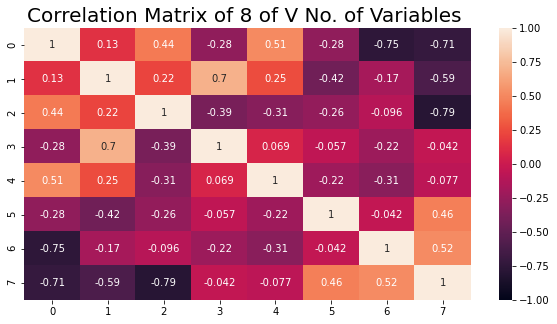

In [52]:
plt.figure(figsize=(10,5))
plt.title("Correlation Matrix of 8 of V No. of Variables ", fontsize =20)

sns.heatmap(prod.iloc[:, :8] .corr(), vmin=-1, vmax=1, annot=True)

plt.savefig("1.4_CM_product.png", bbox_inches='tight')

# Question 1.5

In [53]:
x = df + df_TC_noise  
x

,0,1,2,3,4,5
0,1.635255,0.254560,0.812093,0.778708,1.527624,1.380786
1,0.422596,-1.000668,1.023583,1.059761,0.908743,1.688228
2,1.600616,0.202728,2.141727,1.346888,1.439046,1.440047
3,1.359299,-0.084470,1.651930,0.244952,0.272010,-0.180305
4,0.733246,0.444907,0.819478,0.970587,1.279471,1.350241
...,...,...,...,...,...,...
235,-1.011482,0.963707,-0.255716,0.687575,-0.297509,-0.085591
236,0.188480,-0.144587,-0.447195,-0.511815,-1.012448,0.770627
237,0.019358,-0.961764,-0.426487,0.511098,0.031313,-0.012565
238,-0.005447,1.075152,0.903638,1.489563,-0.110621,-0.139534


In [54]:
#y= df_SM.transpose() + df_SM_noise.transpose()  # all okay
y = df_SM + df_SM_noise

In [55]:
x1 = x.to_numpy()
y1 = y.to_numpy()

print(y1)


y1t= y1.transpose()
print(y1t)

[[ 0.07754408 -0.16361888  0.05710591  0.18000447 -0.16070412 -0.00413048]
 [-0.11150314 -0.17524592 -0.05250753  0.04451243  0.12707146 -0.26091988]
 [-0.18707381 -0.05721659 -0.08842267  0.09746058 -0.2129709  -0.05040863]
 ...
 [ 0.10664454  0.06517746 -0.12317084  0.02184     0.0572761  -0.07373987]
 [ 0.08982631  0.08390918 -0.15472485 -0.06983318  0.02664626  0.02975151]
 [-0.0017314  -0.05947361  0.03319098  0.14013537 -0.30394185 -0.01214925]]
[[ 0.07754408 -0.11150314 -0.18707381 ...  0.10664454  0.08982631
  -0.0017314 ]
 [-0.16361888 -0.17524592 -0.05721659 ...  0.06517746  0.08390918
  -0.05947361]
 [ 0.05710591 -0.05250753 -0.08842267 ... -0.12317084 -0.15472485
   0.03319098]
 [ 0.18000447  0.04451243  0.09746058 ...  0.02184    -0.06983318
   0.14013537]
 [-0.16070412  0.12707146 -0.2129709  ...  0.0572761   0.02664626
  -0.30394185]
 [-0.00413048 -0.26091988 -0.05040863 ... -0.07373987  0.02975151
  -0.01214925]]


In [56]:
X = np.matmul(x1, y1t)

In [57]:
X.shape

(240, 441)

In [58]:
# Create the pandas DataFrame
X_df = pd.DataFrame(X) # replace X with s gives an error
X = X_df
X

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.020501,-0.401083,-0.711336,-0.061897,0.336677,0.162625,-0.022967,0.488322,0.466778,-0.098573,...,0.264064,-0.315137,0.589782,-0.239127,0.159177,-0.220732,-0.149622,0.093641,0.070004,-0.362977
1,0.292700,-0.203348,-0.287662,-0.146796,0.378198,0.322899,-0.134660,0.174342,0.482350,-0.309148,...,0.082041,-0.245621,0.041407,-0.308662,0.142051,-0.023959,-0.153556,-0.195524,-0.203943,-0.055450
2,0.218491,-0.459380,-0.748207,-0.173794,0.498128,0.254072,-0.068949,0.474695,0.717147,-0.230292,...,0.333997,-0.469288,0.312926,-0.633767,0.170358,-0.313625,0.126385,-0.074238,-0.183459,-0.209877
3,0.214686,-0.130989,-0.420492,0.027011,0.247528,0.143330,-0.212168,0.133447,0.412171,-0.077145,...,0.144166,-0.345685,0.109243,-0.700940,-0.158737,-0.082802,0.106407,-0.029788,-0.155804,0.011341
4,-0.005623,-0.349273,-0.481047,-0.148776,0.279816,0.115405,0.102962,0.401099,0.356379,-0.122652,...,0.225970,-0.217036,0.321027,-0.112119,0.273885,-0.250525,0.039754,0.001173,-0.017112,-0.269806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-0.078787,-0.027542,0.291379,-0.186184,-0.091602,-0.278488,0.269772,-0.064329,-0.094926,0.061287,...,0.136932,0.143198,-0.353057,0.425086,0.170731,-0.236985,0.412348,-0.009272,-0.028918,0.123767
236,0.080128,-0.324704,0.139449,-0.145369,-0.145781,0.216997,-0.115898,-0.006821,0.054498,-0.007742,...,-0.123731,0.419660,-0.022173,0.141184,-0.133018,0.012442,-0.285905,-0.060235,0.105681,0.220069
237,0.221529,0.218788,0.132895,0.052345,0.105616,-0.109255,-0.155033,-0.205076,0.120408,-0.055878,...,0.067762,-0.149774,-0.161744,0.118584,-0.142127,0.098963,-0.101547,0.005792,-0.048205,0.105269
238,0.161747,-0.146602,0.035367,-0.245412,0.142812,-0.326824,0.141185,-0.001141,0.330281,0.011098,...,0.400201,-0.155274,-0.409591,0.069717,0.047312,-0.427318,0.633317,-0.005322,-0.161209,0.210117


In [59]:
X_sample = X.sample(n=100, axis='columns')
X_sample



,256,154,277,298,361,249,211,333,329,7,...,88,425,35,217,86,128,421,387,159,431
0,0.549318,-0.037130,-0.311080,1.840788,1.758168,0.518633,1.240963,1.623208,1.025388,0.488322,...,2.027194,0.083377,0.225889,-0.421437,1.967813,-0.084335,0.530235,-0.514624,0.666700,0.264064
1,0.590219,-0.070136,0.191179,1.322584,1.245083,0.701164,1.859359,1.951063,1.563468,0.174342,...,0.744998,-0.183035,-0.889463,-0.122993,0.917833,0.206981,-0.005624,-0.370698,0.489990,0.082041
2,1.898995,-0.101036,0.095239,1.798262,1.672285,0.956815,2.864984,1.641497,0.976816,0.474695,...,2.252403,-0.138291,0.104162,-0.415684,2.127438,-0.122882,0.342433,-0.795095,0.637051,0.333997
3,1.640208,-0.156967,0.164957,0.333596,0.313831,0.094287,1.591090,-0.243439,-0.543132,0.133447,...,2.034620,-0.137434,-0.451012,-0.117109,1.669310,-0.312298,0.031757,-0.574321,0.014235,0.144166
4,0.627821,0.028530,-0.110682,1.514175,1.451375,0.730699,1.430665,1.573615,1.124155,0.401099,...,0.883520,0.011628,0.560505,-0.361606,0.976847,0.050085,0.382381,-0.351591,0.590090,0.225970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-0.051838,0.059767,0.128723,-0.315284,-0.482706,0.808742,-0.019666,-0.136946,0.114990,-0.064329,...,-1.445166,-0.053976,1.320867,-0.034919,-1.214596,0.111610,-0.018527,0.161369,0.063343,0.136932
236,-0.273345,-0.009973,-0.068965,-0.497805,-1.028615,-0.556186,-0.175537,0.820644,0.874530,-0.006821,...,0.221476,0.239368,-0.114677,0.429396,0.043001,0.028885,-0.028136,0.033763,-0.077489,-0.123731
237,-0.688487,-0.149398,0.029566,0.149185,0.124877,0.546665,-0.457478,-0.002866,0.117816,-0.205076,...,0.056912,-0.183490,-0.805788,-0.013561,0.233488,0.075366,-0.161909,-0.031386,0.110640,0.067762
238,1.095288,-0.123916,0.271883,0.045463,-0.304963,1.539158,1.211694,-0.248010,-0.144985,-0.001141,...,0.010150,-0.232425,1.345179,-0.186084,0.062568,-0.114637,0.022430,-0.346139,0.226966,0.400201


In [60]:
R_t = df_TC_noise.to_numpy()
TC = df.to_numpy()


R_s = df_SM_noise.transpose()
R_s = R_s.to_numpy()

SM = df_SM.transpose()
SM = SM.to_numpy()

In [61]:
w1 = np.matmul(TC, R_s)
w1

array([[ 0.14981986, -0.25334666, -0.44141544, ..., -0.01115008,
        -0.07833395, -0.14449615],
       [ 0.14981986, -0.25334666, -0.44141544, ..., -0.01115008,
        -0.07833395, -0.14449615],
       [ 0.14981986, -0.25334666, -0.44141544, ..., -0.01115008,
        -0.07833395, -0.14449615],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
w2 = np.matmul(R_t, SM)
w2

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.10936144,  0.10936144,  0.10936144,
        0.10936144,  0.10936144,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.43580919,  0.43580919,  0.43580919,  0.43580919,  0.43580919,
        0.        ,  0.        ,  0.        ,  0.10936144,  0.10936144,
        0.10936144,  0.10936144,  0.10936144,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.43580919,  0.43580919,  0.43580919,  0.43580919,
        0.43580919,  0.        ,  0.        ,  0.        ,  0.10936144,
        0.10936144,  0.10936144,  0.10936144,  0.10936144,  0.  

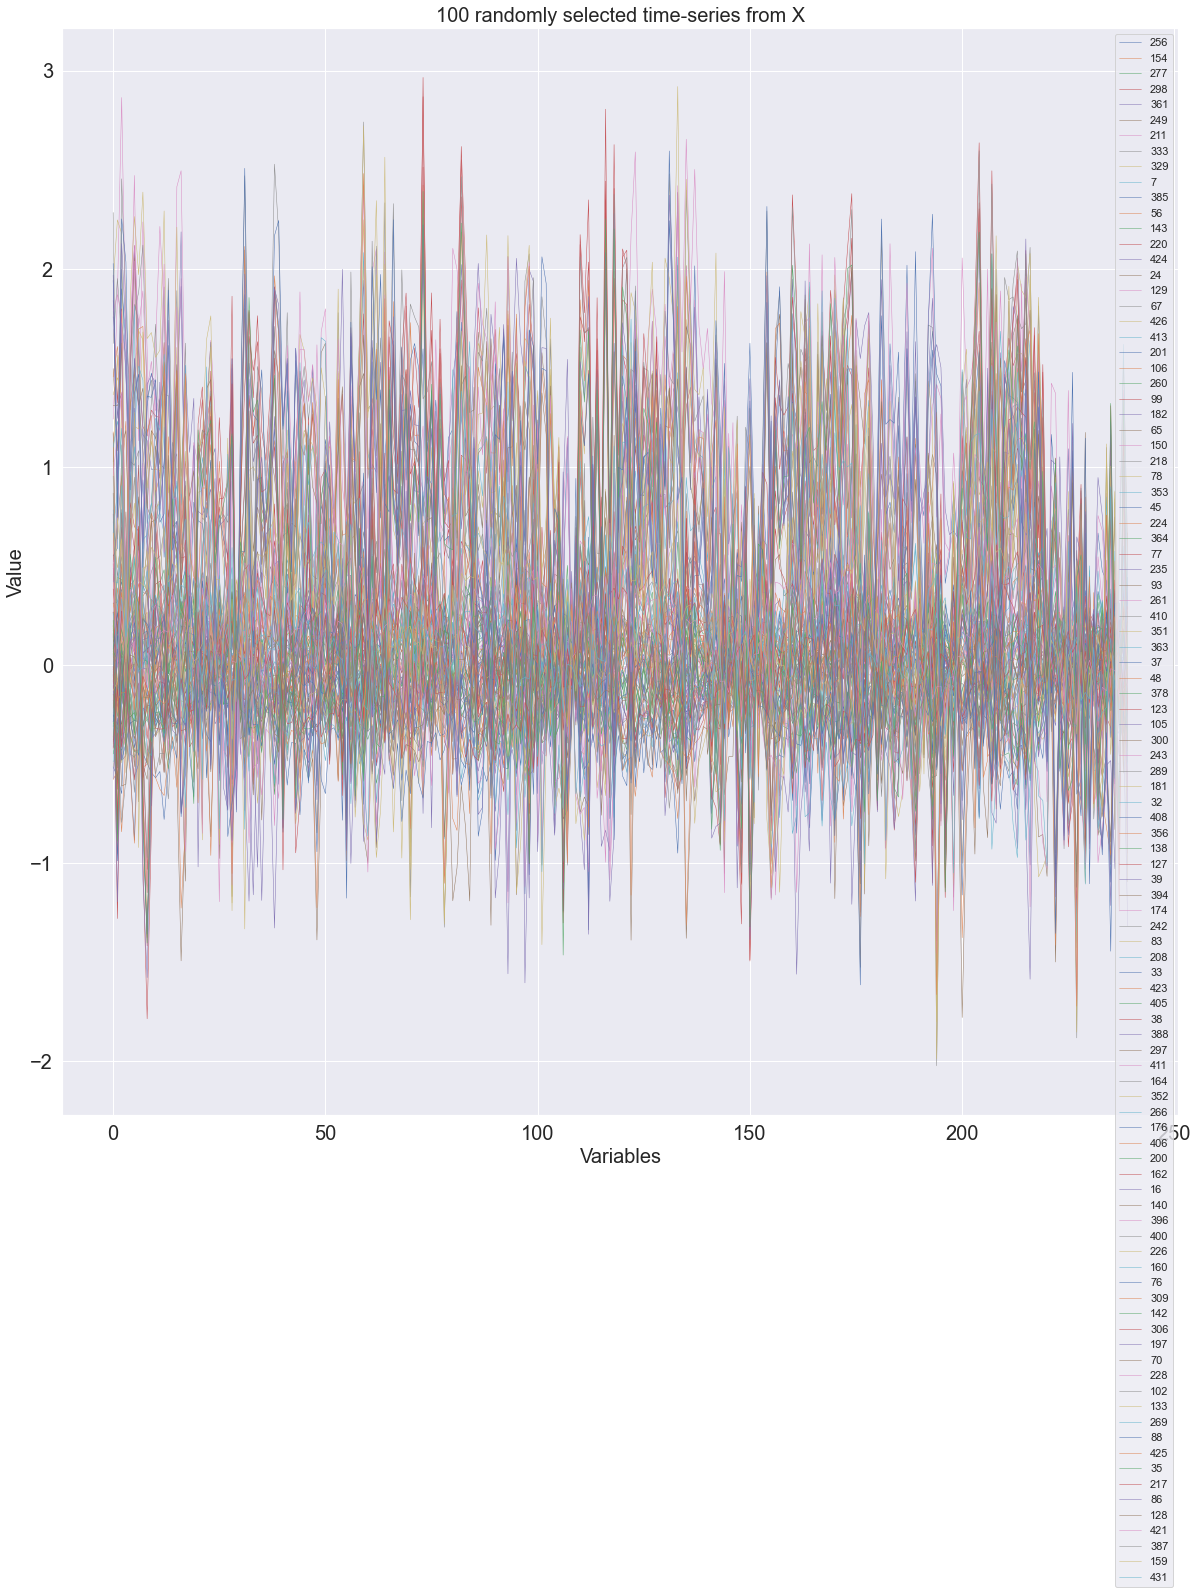

In [73]:


sns.set(rc={'figure.figsize':(20, 20)})

#plt.figure(figsize=(100,5))

X_sample.plot(linewidth=0.5)

plt.title("100 randomly selected time-series from X", fontsize =20)

plt.xlabel("Variables", fontsize =20)

plt.ylabel("Value", fontsize =20)

plt.tick_params(labelsize=20)

plt.savefig("1.5_time_series.png", bbox_inches='tight')

In [74]:
#X.std(axis = 0)
X.var()

0      0.036579
1      0.043735
2      0.046283
3      0.015669
4      0.021265
         ...   
436    0.030474
437    0.055389
438    0.016575
439    0.019695
440    0.044523
Length: 441, dtype: float64

In [75]:
X_var = X.var()
X_var

0      0.036579
1      0.043735
2      0.046283
3      0.015669
4      0.021265
         ...   
436    0.030474
437    0.055389
438    0.016575
439    0.019695
440    0.044523
Length: 441, dtype: float64

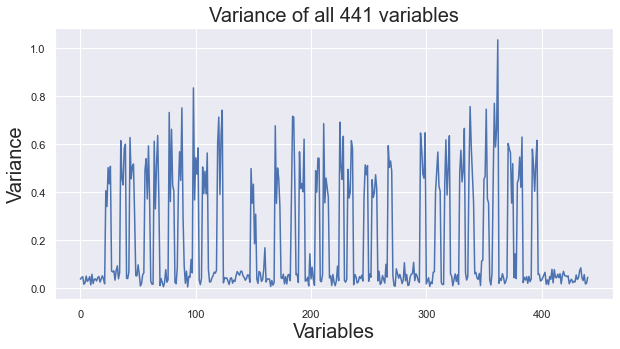

In [76]:
plt.figure(figsize=(10,5))

X_var.plot()

plt.title("Variance of all 441 variables", fontsize = 20)

plt.xlabel("Variables", fontsize = 20)

plt.ylabel("Variance", fontsize = 20)


plt.savefig("1.5_plot_variance.png", bbox_inches='tight')

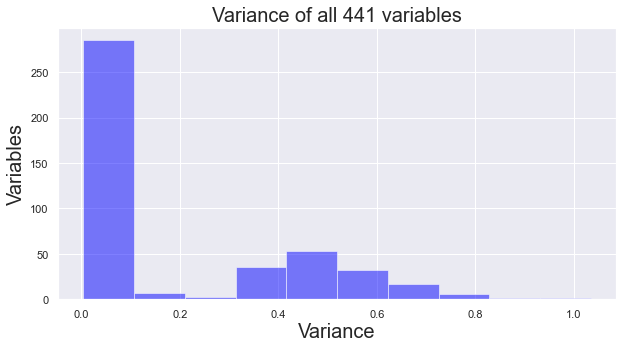

In [217]:
plt.figure(figsize=(10,5))
plt.hist(X_var, facecolor='blue', alpha=0.5)

plt.title("Variance of all 441 variables", fontsize = 20)

plt.xlabel("Variance", fontsize = 20)

plt.ylabel("Variables", fontsize = 20)


plt.savefig("1.5_hist_variance.png", bbox_inches='tight')


In [77]:
# standardizing X

X = (X - X.mean()) / X.std()
X

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.215328,-0.779152,-2.149625,0.231068,1.599768,0.421828,-0.457919,1.462628,1.340627,-0.555129,...,0.819890,-1.284640,1.554011,-0.575410,0.221050,-0.386875,-0.771365,0.653241,0.402876,-1.196249
1,1.638551,0.166363,-0.180286,-0.447158,1.884502,1.143104,-1.130262,-0.251676,1.412255,-2.396697,...,-0.145627,-0.945021,-0.495670,-0.815423,0.138263,0.740317,-0.788080,-1.592821,-1.549146,0.261188
2,1.250538,-1.057914,-2.321013,-0.662838,2.706927,0.833366,-0.734710,1.388229,2.492293,-1.707068,...,1.190839,-2.037748,0.519199,-1.937575,0.275102,-0.919001,0.401397,-0.650741,-1.403184,-0.470676
3,1.230642,0.512368,-0.797715,0.941321,0.988423,0.334995,-1.596827,-0.474960,1.089439,-0.367729,...,0.183905,-1.433885,-0.242114,-2.169436,-1.315736,0.403242,0.316510,-0.305482,-1.206126,0.577728
4,0.078739,-0.531413,-1.079189,-0.462977,1.209842,0.209322,0.300115,0.986396,0.832802,-0.765709,...,0.617825,-0.805366,0.549477,-0.137022,0.775545,-0.557540,0.033297,-0.064994,-0.217870,-0.754692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-0.303809,1.007021,2.511242,-0.761818,-1.337175,-1.563306,1.304237,-1.554804,-1.243153,0.842924,...,0.145536,0.954555,-1.970071,1.717233,0.276900,-0.479977,1.616458,-0.146126,-0.301995,1.110541
236,0.527094,-0.413930,1.805033,-0.435760,-1.708716,0.666518,-1.017323,-1.240816,-0.555817,0.239228,...,-1.237119,2.305211,-0.733313,0.737297,-1.191410,0.948838,-1.350431,-0.541975,0.657096,1.566938
237,1.266422,2.184909,1.774568,1.143705,0.015256,-0.801709,-1.252898,-2.323273,-0.252639,-0.181743,...,-0.221370,-0.476761,-1.254996,0.659288,-1.235443,1.444466,-0.567094,-0.029114,-0.439427,1.022872
238,0.953848,0.437708,1.321233,-1.234970,0.270326,-1.780836,0.530205,-1.209801,0.712752,0.403996,...,1.542013,-0.503631,-2.181380,0.490616,-0.319703,-1.570278,2.555359,-0.115441,-1.244644,1.519772


# Question 2: Data analysis, results visualization, & performance metrics

# Question 2.1

In [78]:
D = df.to_numpy()
D

array([[1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [79]:
# A_LSR = (DTD)-1*DTX

In [80]:
D_transpose = D.transpose()
D_transpose

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [81]:
D_transpose_D = np.matmul(D_transpose, D)
#D_transpose_D = np.dot(D_transpose, D) # same result as above
D_transpose_D

array([[115,  50,  60,  50,  60,  75],
       [ 50, 100,  40,  45,  50,  55],
       [ 60,  40, 100,  40,  50,  70],
       [ 50,  45,  40,  90,  90,  90],
       [ 60,  50,  50,  90, 120, 120],
       [ 75,  55,  70,  90, 120, 145]], dtype=int64)

In [82]:
D_transpose_D_inv = np.linalg.inv(D_transpose_D)
D_transpose_D_inv

array([[ 0.01570352, -0.00330076, -0.00485214, -0.00185029,  0.00181325,
        -0.00488025],
       [-0.00330076,  0.01450597, -0.00212812, -0.00386536, -0.00138979,
         0.00078176],
       [-0.00485214, -0.00212812,  0.01811777, -0.00022546,  0.00709012,
        -0.01115731],
       [-0.00185029, -0.00386536, -0.00022546,  0.04616913, -0.0340608 ,
         0.00206361],
       [ 0.00181325, -0.00138979,  0.00709012, -0.0340608 ,  0.07707926,
        -0.04648208],
       [-0.00488025,  0.00078176, -0.01115731,  0.00206361, -0.04648208,
         0.05169764]])

In [83]:
np.dot(D_transpose_D_inv, D_transpose_D)  # identity matrix obtained

array([[ 1.00000000e+00, -9.54097912e-18,  2.09901541e-16,
        -1.56125113e-17, -2.08166817e-17,  8.58688121e-17],
       [ 7.02563008e-17,  1.00000000e+00,  3.64291930e-17,
         1.21430643e-17,  6.24500451e-17,  3.72965547e-17],
       [-7.80625564e-17, -1.68268177e-16,  1.00000000e+00,
        -9.36750677e-17, -1.24900090e-16,  2.93168267e-16],
       [ 4.20670443e-17,  1.13190707e-16, -1.30971622e-16,
         1.00000000e+00, -3.43475248e-16, -5.05238212e-16],
       [-3.26128013e-16, -2.98372438e-16, -9.71445147e-17,
        -5.68989300e-16,  1.00000000e+00,  9.08995101e-16],
       [-1.80411242e-16, -1.38777878e-17,  3.05311332e-16,
         1.38777878e-16, -1.11022302e-16,  1.00000000e+00]])

In [84]:
X = X.to_numpy()
D_transpose_X = np.matmul(D_transpose, X)
D_transpose_X

array([[ 32.33666801, -41.83398802, -49.07843312, ...,  30.44916869,
         22.15685821,   6.52122954],
       [-42.1428571 , -42.74435865,  -4.83093384, ...,  46.82461272,
         43.62899553,  -6.35140985],
       [ 25.93945884, -27.80857925, -26.84225519, ..., -48.00173961,
        -53.75313672,  13.62727158],
       [ 17.72368301, -14.0654768 , -30.00238511, ...,   7.1673256 ,
        -15.35910427, -22.70609814],
       [ -9.11175582, -14.40114033, -55.46370535, ...,  -0.84458671,
         -9.45007406, -61.0136529 ],
       [  3.06665391, -29.11719012, -52.66175993, ..., -17.00948055,
        -13.75937309, -46.46331261]])

In [85]:
A_LSR = np.matmul(D_transpose_D_inv, D_transpose_X)
A_LSR = abs(A_LSR)                  ### taking absolute
A_LSR

array([[0.45675914, 0.23890933, 0.41256984, ..., 0.62473095, 0.54318231,
        0.21538172],
       [0.82670864, 0.37116429, 0.30092676, ..., 0.64105682, 0.73588538,
        0.00641827],
       [0.29993327, 0.01605499, 0.03682199, ..., 0.934901  , 1.084265  ,
        0.31970124],
       [1.23218603, 0.02993421, 0.51081544, ..., 0.09806388, 0.61315281,
        0.94338297],
       [1.14743667, 0.50886424, 1.07795982, ..., 0.13120836, 0.03272743,
        1.65251701],
       [0.13847602, 0.38390752, 0.32889196, ..., 0.40172488, 0.22195358,
        0.19830725]])

In [87]:
A_LSR_transpose = A_LSR.transpose()                   
A_LSR_transpose

array([[0.45675914, 0.82670864, 0.29993327, 1.23218603, 1.14743667,
        0.13847602],
       [0.23890933, 0.37116429, 0.01605499, 0.02993421, 0.50886424,
        0.38390752],
       [0.41256984, 0.30092676, 0.03682199, 0.51081544, 1.07795982,
        0.32889196],
       ...,
       [0.62473095, 0.64105682, 0.934901  , 0.09806388, 0.13120836,
        0.40172488],
       [0.54318231, 0.73588538, 1.084265  , 0.61315281, 0.03272743,
        0.22195358],
       [0.21538172, 0.00641827, 0.31970124, 0.94338297, 1.65251701,
        0.19830725]])

In [88]:
D_LSR = np.matmul(X, A_LSR_transpose)
D_LSR

array([[ 59.36619849,  30.56902703,  30.50984164,  41.52370843,
         67.8245215 ,  30.84999236],
       [  6.89891232, -11.85222713,  44.41290379,  46.32915908,
         43.72952932,  28.40354942],
       [ 76.50598629,  59.17615703, 106.14662924,  85.88994226,
         86.659822  ,  61.75131888],
       ...,
       [-51.91514516, -90.82979963, -54.10050582, -23.92755665,
        -41.38535884, -52.47461717],
       [  0.5438736 ,  17.53338552,  24.30258436,  63.06294787,
        -12.88744762,   5.751047  ],
       [-49.7997514 , -82.97576079, -76.05104871, -26.66942117,
        -93.38265461, -62.13220997]])

In [89]:
# Create the pandas DataFrame
df_D_LSR = pd.DataFrame(D_LSR)
df_D_LSR

,0,1,2,3,4,5
0,59.366198,30.569027,30.509842,41.523708,67.824521,30.849992
1,6.898912,-11.852227,44.412904,46.329159,43.729529,28.403549
2,76.505986,59.176157,106.146629,85.889942,86.659822,61.751319
3,16.578458,-16.352879,56.071415,-9.316411,-7.664419,-10.551781
4,35.960552,35.916607,31.047029,50.913206,57.659007,36.288649
...,...,...,...,...,...,...
235,-52.118505,-15.415473,-44.014514,3.113533,-47.150011,-21.131574
236,-51.406544,-54.255081,-53.382630,-62.555890,-83.115609,-37.926423
237,-51.915145,-90.829800,-54.100506,-23.927557,-41.385359,-52.474617
238,0.543874,17.533386,24.302584,63.062948,-12.887448,5.751047


In [90]:
# checking
D_LSR_stand = (D_LSR - D_LSR.mean())/(D_LSR.std())
D_LSR_stand

array([[ 1.59536641,  0.82149102,  0.81990051,  1.1158796 ,  1.82266957,
         0.82904149],
       [ 0.18539663, -0.3185086 ,  1.19352185,  1.24501797,  1.17515731,
         0.76329746],
       [ 2.05596928,  1.59025936,  2.85251154,  2.30814726,  2.32883648,
         1.65946249],
       ...,
       [-1.39513192, -2.4408976 , -1.4538598 , -0.64301271, -1.11216168,
        -1.41016679],
       [ 0.01461569,  0.47118015,  0.65309095,  1.69471031, -0.34632841,
         0.15454968],
       [-1.33828428, -2.22983355, -2.0437436 , -0.71669569, -2.50950127,
        -1.6696983 ]])

In [91]:
# Create the pandas DataFrame
df_D_LSR_stand = pd.DataFrame(D_LSR_stand)
df_D_LSR_stand

,0,1,2,3,4,5
0,1.595366,0.821491,0.819901,1.115880,1.822670,0.829041
1,0.185397,-0.318509,1.193522,1.245018,1.175157,0.763297
2,2.055969,1.590259,2.852512,2.308147,2.328836,1.659462
3,0.445518,-0.439456,1.506825,-0.250363,-0.205968,-0.283561
4,0.966379,0.965198,0.834337,1.368206,1.549489,0.975196
...,...,...,...,...,...,...
235,-1.400597,-0.414265,-1.182816,0.083671,-1.267077,-0.567875
236,-1.381464,-1.458014,-1.434568,-1.681084,-2.233592,-1.019209
237,-1.395132,-2.440898,-1.453860,-0.643013,-1.112162,-1.410167
238,0.014616,0.471180,0.653091,1.694710,-0.346328,0.154550


In [92]:
# temperory name for reshaping and plotting purpose
k1 = A_LSR

In [93]:

tpp = k1.reshape((k1.shape[0], 21,21), order='F')
#tpp

array([[[0.45675914, 0.32378867, 0.34400701, ..., 0.44368938,
         0.59110467, 0.43811374],
        [0.23890933, 1.14917713, 1.0918941 , ..., 0.09464843,
         0.86582124, 0.26232097],
        [0.41256984, 1.01042868, 1.0449509 , ..., 0.38746681,
         0.39639414, 0.09686989],
        ...,
        [0.27640467, 0.37829919, 0.16141743, ..., 0.19088941,
         0.20394756, 0.62473095],
        [0.45989018, 0.22181527, 0.64162846, ..., 0.16656013,
         0.9377013 , 0.54318231],
        [0.29644389, 1.0618335 , 0.66345178, ..., 0.60024585,
         0.52630763, 0.21538172]],

       [[0.82670864, 0.68563748, 0.33398585, ..., 0.46340618,
         0.79761012, 0.62667307],
        [0.37116429, 0.2224585 , 0.20441203, ..., 0.48734476,
         0.24029563, 0.53418971],
        [0.30092676, 0.27703397, 0.05289122, ..., 0.41851896,
         0.09503078, 1.09046626],
        ...,
        [0.16847914, 1.20073916, 1.0767945 , ..., 0.49132162,
         0.69455822, 0.64105682],
        [1.0

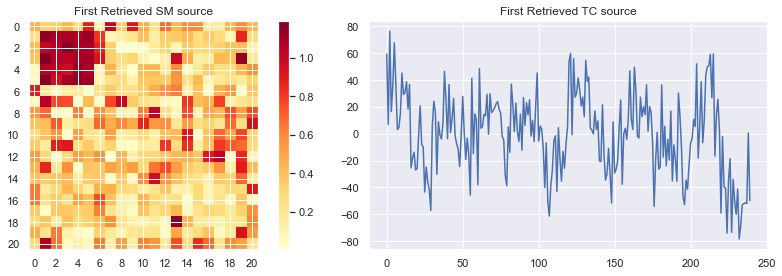

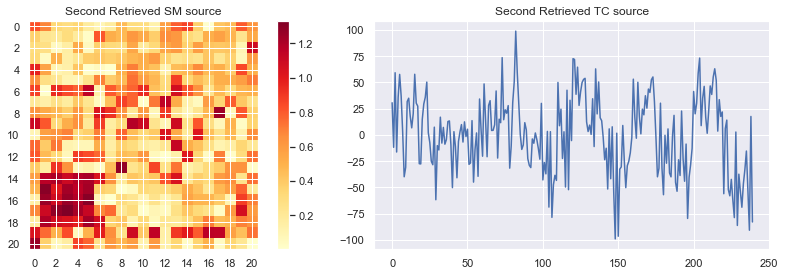

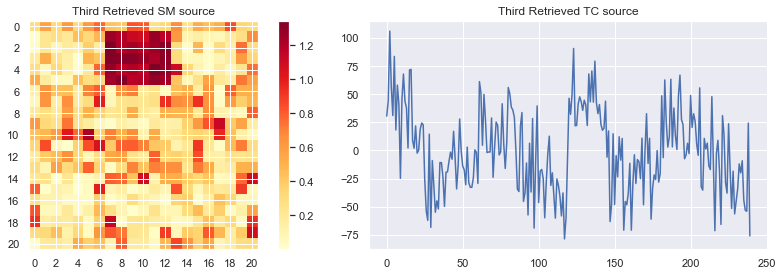

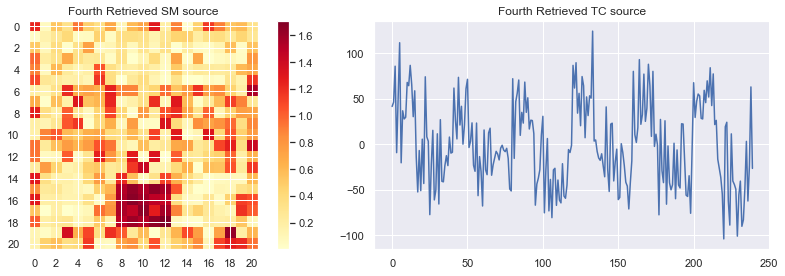

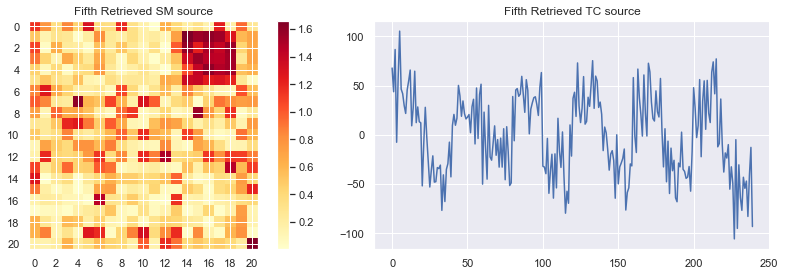

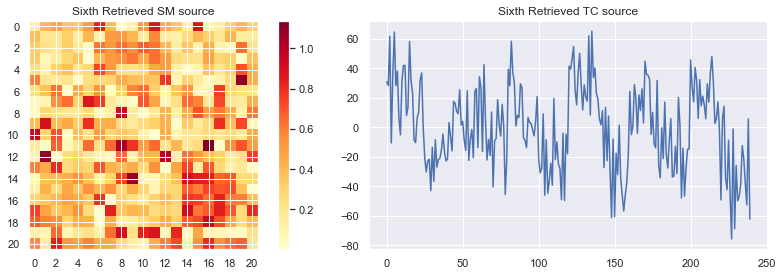

In [97]:
titles_SMs = ["First Retrieved SM source", "Second Retrieved SM source", "Third Retrieved SM source", 
              "Fourth Retrieved SM source", "Fifth Retrieved SM source", "Sixth Retrieved SM source"]

titles_TCs = ["First Retrieved TC source", "Second Retrieved TC source", "Third Retrieved TC source", 
              "Fourth Retrieved TC source", "Fifth Retrieved TC source", "Sixth Retrieved TC source"]

for i in range(6):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    
    c = ax[0].imshow(tpp[i],cmap= "YlOrRd", interpolation='nearest') 
    
    fig.colorbar(c ,ax = ax[0])

    ax[0].title.set_text(titles_SMs[i])
    ax[0].set_xticks(np.arange(0, 21, 2))
    ax[0].set_yticks(np.arange(0, 21, 2))
    
    
 
    ax[1].plot(df_D_LSR[i])
    ax[1].title.set_text(titles_TCs[i])
    
    fig.tight_layout()

    plt.savefig("2.1_six_retrieved_sources{}.png".format(i), bbox_inches='tight')
    

In [98]:
# Create the pandas DataFrame
X_df = pd.DataFrame(X_df)
#print(X_df)

# Create the pandas DataFrame
D_LSR_df = pd.DataFrame(D_LSR)
print(D_LSR_df)

             0          1           2          3          4          5
0    59.366198  30.569027   30.509842  41.523708  67.824521  30.849992
1     6.898912 -11.852227   44.412904  46.329159  43.729529  28.403549
2    76.505986  59.176157  106.146629  85.889942  86.659822  61.751319
3    16.578458 -16.352879   56.071415  -9.316411  -7.664419 -10.551781
4    35.960552  35.916607   31.047029  50.913206  57.659007  36.288649
..         ...        ...         ...        ...        ...        ...
235 -52.118505 -15.415473  -44.014514   3.113533 -47.150011 -21.131574
236 -51.406544 -54.255081  -53.382630 -62.555890 -83.115609 -37.926423
237 -51.915145 -90.829800  -54.100506 -23.927557 -41.385359 -52.474617
238   0.543874  17.533386   24.302584  63.062948 -12.887448   5.751047
239 -49.799751 -82.975761  -76.051049 -26.669421 -93.382655 -62.132210

[240 rows x 6 columns]


Scatter Plots:

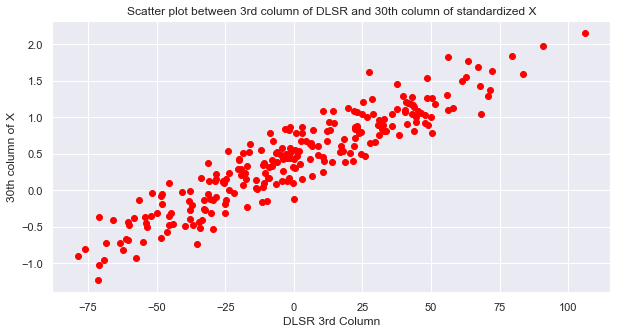

In [99]:
# scatter plot between 3rd column of DLSR and 30th column of standardized X
plt.figure(figsize=(10,5))
plt.scatter(D_LSR_df[2], X_df[9*21+2], color ='red')
plt.title("Scatter plot between 3rd column of DLSR and 30th column of standardized X")
plt.xlabel("DLSR 3rd Column")
plt.ylabel("30th column of X")

plt.savefig("2.1_3rd_30th.png", bbox_inches='tight')
plt.show()


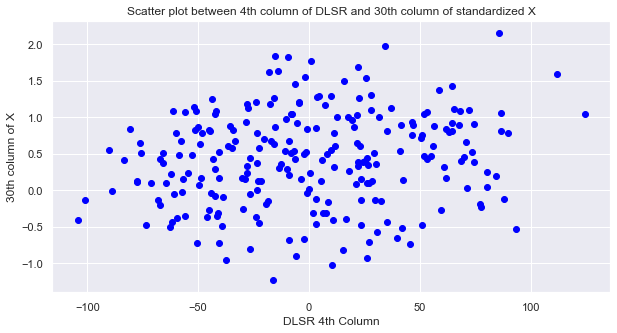

In [100]:
# scatter plot between 4th column of DLSR and 30th column of standardized X
plt.figure(figsize=(10,5))
plt.scatter(D_LSR_df[3], X_df[9*21+2], color ='blue')
plt.title("Scatter plot between 4th column of DLSR and 30th column of standardized X")
plt.xlabel("DLSR 4th Column")
plt.ylabel("30th column of X")
plt.savefig("2.1_4th_30th.png", bbox_inches='tight')

plt.show()

In [351]:
# third TC source has the most correlation with 30th column of X
np.corrcoef(df[2], X_df[9*21+2])


array([[1.       , 0.6697984],
       [0.6697984, 1.       ]])

# Question 2.2:

In [104]:
# Creating Identity matrix
I = np.identity(6)
#I

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [105]:
lambda_val = 0.4  # was 4

In [106]:
V = 441

lambda_tilde = lambda_val * V
lambda_tilde

176.4

In [108]:
lambda_tilde_I = lambda_tilde*I
lambda_tilde_I

array([[176.4,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. , 176.4,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. , 176.4,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , 176.4,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. , 176.4,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. , 176.4]])

In [109]:
D_transpose_D_lambda_tilde_I = D_transpose_D + lambda_tilde_I
D_transpose_D_lambda_tilde_I

array([[291.4,  50. ,  60. ,  50. ,  60. ,  75. ],
       [ 50. , 276.4,  40. ,  45. ,  50. ,  55. ],
       [ 60. ,  40. , 276.4,  40. ,  50. ,  70. ],
       [ 50. ,  45. ,  40. , 266.4,  90. ,  90. ],
       [ 60. ,  50. ,  50. ,  90. , 296.4, 120. ],
       [ 75. ,  55. ,  70. ,  90. , 120. , 321.4]])

In [110]:
D_transpose_D_lambda_tilde_I_inv = np.linalg.inv(D_transpose_D_lambda_tilde_I)
D_transpose_D_lambda_tilde_I_inv

array([[ 0.00386333, -0.0004119 , -0.00054924, -0.00029132, -0.00032569,
        -0.00050823],
       [-0.0004119 ,  0.00390427, -0.00029638, -0.00033394, -0.00030188,
        -0.00030123],
       [-0.00054924, -0.00029638,  0.00398819, -0.00018033, -0.0002333 ,
        -0.00055213],
       [-0.00029132, -0.00033394, -0.00018033,  0.00444858, -0.00090392,
        -0.00074382],
       [-0.00032569, -0.00030188, -0.0002333 , -0.00090392,  0.00427615,
        -0.00116498],
       [-0.00050823, -0.00030123, -0.00055213, -0.00074382, -0.00116498,
         0.00404504]])

In [111]:
A_RR = np.matmul(D_transpose_D_lambda_tilde_I_inv, D_transpose_X)
A_RR

array([[ 0.12428485, -0.10515219, -0.11930453, ...,  0.13154437,
         0.11169697,  0.07042597],
       [-0.18963612, -0.12359657,  0.05193554, ...,  0.18748555,
         0.18927053,  0.00847504],
       [ 0.09541772, -0.05328799, -0.03123827, ..., -0.21374594,
        -0.22690663,  0.0966319 ],
       [ 0.08477575,  0.00357981, -0.02341136, ...,  0.02944894,
        -0.06088061, -0.01353449],
       [-0.06241804,  0.01807023, -0.12499634, ..., -0.00312829,
        -0.01834359, -0.18963627],
       [-0.00822531, -0.04104983, -0.08486968, ..., -0.0762284 ,
        -0.02794827, -0.10890219]])

In [112]:
# taking absolute of estimates in A_RR
A_RR = abs(A_RR)

In [114]:
A_RR_transpose = A_RR.transpose()
#A_RR_transpose

array([[0.12428485, 0.18963612, 0.09541772, 0.08477575, 0.06241804,
        0.00822531],
       [0.10515219, 0.12359657, 0.05328799, 0.00357981, 0.01807023,
        0.04104983],
       [0.11930453, 0.05193554, 0.03123827, 0.02341136, 0.12499634,
        0.08486968],
       ...,
       [0.13154437, 0.18748555, 0.21374594, 0.02944894, 0.00312829,
        0.0762284 ],
       [0.11169697, 0.18927053, 0.22690663, 0.06088061, 0.01834359,
        0.02794827],
       [0.07042597, 0.00847504, 0.0966319 , 0.01353449, 0.18963627,
        0.10890219]])

In [115]:
D_RR = np.matmul(X, A_RR_transpose)
#D_RR

array([[ 15.46227926,   6.652988  ,   6.8114532 ,  10.63394407,
         13.95469209,  10.68552689],
       [  2.82583944,  -5.0454319 ,  11.63651656,  11.4253477 ,
         12.39169342,   9.12970106],
       [ 18.37510712,  12.48923052,  24.80614397,  17.45742069,
         17.72023241,  13.08256597],
       ...,
       [-10.60984292, -23.56604737, -11.48732744,  -5.90622838,
         -9.08885289, -10.15611421],
       [ -1.31463583,   4.40046961,   6.02751791,   7.10367564,
         -1.62076942,  -4.15497639],
       [-10.17995958, -20.96374061, -18.38050599, -12.01087568,
        -18.99605428, -15.47113619]])

Maximum Correlation:

In [124]:

cTLSR = []
def corrr(a,b):
    c = np.corrcoef(a, b)[1,0]
    cTLSR.append(abs(c))

for i in range(6):
    corrr(D[:,i].transpose(),D_LSR[:,i].transpose())

print(cTLSR)

[0.4936813992608476, 0.4664160443494826, 0.6705794764602493, 0.7135679105535369, 0.792726491469504, 0.6480172724161997]


In [125]:
cTLSR = np.array(cTLSR)
cTLSR

array([0.4936814 , 0.46641604, 0.67057948, 0.71356791, 0.79272649,
       0.64801727])

In [126]:
cTRR = []
def corrr(a,b):
    c = np.corrcoef(a, b)[1,0]
    cTRR.append(abs(c))

for i in range(6):
    corrr(D[:,i].transpose(),D_RR[:,i].transpose())

print(cTRR)

[0.5284297468596839, 0.5074189542921457, 0.649997238744548, 0.7398962321495411, 0.8007850697637494, 0.734408784656419]


In [127]:
cTRR = np.array(cTRR)
cTRR

array([0.52842975, 0.50741895, 0.64999724, 0.73989623, 0.80078507,
       0.73440878])

In [128]:
sum_cTLSR = sum(cTLSR)
print("sum_cTLSR: ")
print(sum_cTLSR)

sum_cTRR = sum(cTRR)
print("sum_cTRR: ")
print(sum_cTRR)

sum_cTLSR: 
3.78498859450982
sum_cTRR: 
3.9609360264660873


In [129]:
sum_cTRR > sum_cTLSR

True

In [130]:
lambda_val = 1000

lambda_tilde_1000 = lambda_val * V

lambda_tilde_I_1000 = lambda_tilde_1000*I

D_transpose_D_lambda_tilde_I_1000 = D_transpose_D + lambda_tilde_I_1000

D_transpose_D_lambda_tilde_I_inv_1000 = np.linalg.inv(D_transpose_D_lambda_tilde_I_1000)

A_RR_1000 = np.matmul(D_transpose_D_lambda_tilde_I_inv_1000, D_transpose_X)

A_RR_1000 = abs(A_RR_1000)

In [131]:
A_RR_1000

array([[7.33065721e-05, 9.47981145e-05, 1.11205368e-04, ...,
        6.90354808e-05, 5.02467334e-05, 1.48234739e-05],
       [9.55566328e-05, 9.68723846e-05, 1.08978449e-05, ...,
        1.06159602e-04, 9.89247562e-05, 1.43694612e-05],
       [5.88025920e-05, 6.30049801e-05, 6.07975401e-05, ...,
        1.08836959e-04, 1.21866839e-04, 3.09301698e-05],
       [4.01804656e-05, 3.18415487e-05, 6.79495250e-05, ...,
        1.62485972e-05, 3.48148007e-05, 5.14305682e-05],
       [2.06718477e-05, 3.25913104e-05, 1.25664257e-04, ...,
        1.91655144e-06, 2.14115592e-05, 1.38280077e-04],
       [6.93912372e-06, 6.59501190e-05, 1.19297213e-04, ...,
        3.85680690e-05, 3.11787486e-05, 1.05281884e-04]])

In [132]:
A_LSR

array([[0.45675914, 0.23890933, 0.41256984, ..., 0.62473095, 0.54318231,
        0.21538172],
       [0.82670864, 0.37116429, 0.30092676, ..., 0.64105682, 0.73588538,
        0.00641827],
       [0.29993327, 0.01605499, 0.03682199, ..., 0.934901  , 1.084265  ,
        0.31970124],
       [1.23218603, 0.02993421, 0.51081544, ..., 0.09806388, 0.61315281,
        0.94338297],
       [1.14743667, 0.50886424, 1.07795982, ..., 0.13120836, 0.03272743,
        1.65251701],
       [0.13847602, 0.38390752, 0.32889196, ..., 0.40172488, 0.22195358,
        0.19830725]])

In [133]:
# temperory name for reshaping and plotting purpose
k2 = A_RR_1000
tpp1 = k2.reshape((k2.shape[0], 21,21), order='F')
#tpp1

array([[[7.33065721e-05, 7.36937461e-05, 1.08481690e-04, ...,
         8.59264647e-05, 6.54263979e-05, 1.67457149e-05],
        [9.47981145e-05, 1.76826409e-04, 1.82012789e-04, ...,
         2.67875578e-05, 8.08996164e-05, 7.27633646e-05],
        [1.11205368e-04, 1.78198617e-04, 1.81587095e-04, ...,
         2.74820752e-05, 3.28432754e-05, 5.94372104e-05],
        ...,
        [1.06328371e-05, 2.65428562e-05, 2.42198226e-05, ...,
         2.62084065e-05, 8.91648140e-05, 6.90354808e-05],
        [7.83686369e-05, 3.69558263e-05, 1.26275930e-04, ...,
         4.91035234e-05, 1.14769311e-04, 5.02467334e-05],
        [2.05423927e-05, 1.63866288e-04, 1.41928796e-04, ...,
         1.22213920e-04, 7.73145822e-05, 1.48234739e-05]],

       [[9.55566328e-05, 1.12747515e-04, 1.18585036e-04, ...,
         1.15390536e-04, 1.18031180e-04, 1.43188231e-04],
        [9.68723846e-05, 5.54867564e-06, 2.27365816e-05, ...,
         1.90070509e-05, 6.13754803e-05, 1.19903440e-04],
        [1.08978449e-05, 

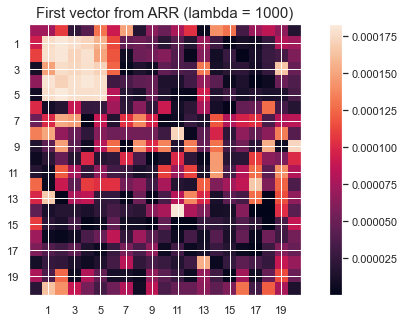

In [140]:

plt.figure(figsize=(10,5))
plt.imshow(tpp1[0], interpolation='nearest')   #, interpolation='nearest'
plt.colorbar()
plt.title("First vector from ARR (lambda = 1000)", fontsize=15)
plt.yticks(np.arange(1, 21, 2))
plt.xticks(np.arange(1, 21, 2))

plt.savefig("2.2_1st_vec_lambda_1000.png", bbox_inches='tight')

plt.show()

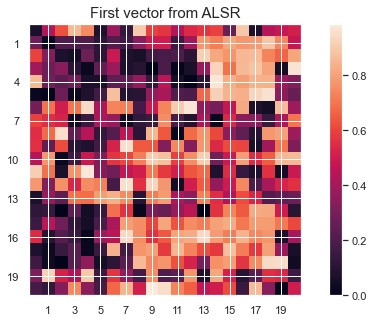

In [317]:

plt.figure(figsize=(10,5))
plt.imshow(tpp[0], interpolation='nearest')   #cmap= "YlOrRd"
plt.colorbar()
plt.title("First vector from ALSR", fontsize=15)
plt.yticks(np.arange(1, 21, 3))
plt.xticks(np.arange(1, 21, 2))

plt.savefig("2.2_1st_vec_ALSR.png", bbox_inches='tight')

plt.show()

In [142]:
# creating dataframe
df_A_LSR = pd.DataFrame(A_LSR)
df_A_LSR

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.456759,0.238909,0.412570,0.370894,0.069697,0.038613,0.894213,0.054217,0.543306,0.381667,...,0.273600,0.091355,0.411296,0.158968,0.916069,0.051216,0.587537,0.624731,0.543182,0.215382
1,0.826709,0.371164,0.300927,0.325654,0.971300,0.636143,0.874350,0.200014,0.635552,1.099566,...,0.207694,0.738519,0.026046,0.744126,0.193179,0.700132,0.600309,0.641057,0.735885,0.006418
2,0.299933,0.016055,0.036822,0.181432,0.293566,0.528127,0.134712,0.075178,0.199726,0.613767,...,0.295223,0.255160,0.507588,1.092588,0.065219,0.088222,0.560567,0.934901,1.084265,0.319701
3,1.232186,0.029934,0.510815,0.981051,0.891423,1.094550,0.182554,0.661258,1.264059,0.184637,...,1.428986,0.632143,1.155740,0.596429,0.389438,1.067446,1.020764,0.098064,0.613153,0.943383
4,1.147437,0.508864,1.077960,0.906868,0.443800,0.309256,0.851826,0.994249,0.715560,0.264496,...,0.361419,0.877531,1.106578,0.398463,1.208782,0.404315,0.123952,0.131208,0.032727,1.652517
5,0.138476,0.383908,0.328892,0.337767,0.258656,0.593938,0.257725,0.041608,0.048857,0.392513,...,0.514045,0.759153,0.035889,0.293543,0.006858,0.388662,0.813495,0.401725,0.221954,0.198307


In [143]:
# maximum value of first vector from A_RR when lambda = 1000
A_RR_1000[0].max()

0.00018376909793867062

In [144]:
# mean value of first vector from A_RR when lambda = 1000
A_RR_1000[0].mean()

5.86924235609311e-05

In [145]:
# minimum value of first vector from A_RR when lambda = 1000
A_RR_1000[0].min()

1.8556123914161063e-08

In [146]:
# maximum value of first vector from A_RR when lambda = 0.4
A_RR[0].max()

0.30344731335185776

In [147]:
# mean value of first vector from A_RR when lambda = 0.4
A_RR[0].mean()

0.09904790987414322

In [148]:
# minimum value of first vector from A_RR when lambda = 0.4
A_RR[0].min()

0.00021784365707671203

# Question 2.3:

In [153]:
# Create the pandas DataFrame
X_df = pd.DataFrame(X)
#X_df

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.215328,-0.779152,-2.149625,0.231068,1.599768,0.421828,-0.457919,1.462628,1.340627,-0.555129,...,0.819890,-1.284640,1.554011,-0.575410,0.221050,-0.386875,-0.771365,0.653241,0.402876,-1.196249
1,1.638551,0.166363,-0.180286,-0.447158,1.884502,1.143104,-1.130262,-0.251676,1.412255,-2.396697,...,-0.145627,-0.945021,-0.495670,-0.815423,0.138263,0.740317,-0.788080,-1.592821,-1.549146,0.261188
2,1.250538,-1.057914,-2.321013,-0.662838,2.706927,0.833366,-0.734710,1.388229,2.492293,-1.707068,...,1.190839,-2.037748,0.519199,-1.937575,0.275102,-0.919001,0.401397,-0.650741,-1.403184,-0.470676
3,1.230642,0.512368,-0.797715,0.941321,0.988423,0.334995,-1.596827,-0.474960,1.089439,-0.367729,...,0.183905,-1.433885,-0.242114,-2.169436,-1.315736,0.403242,0.316510,-0.305482,-1.206126,0.577728
4,0.078739,-0.531413,-1.079189,-0.462977,1.209842,0.209322,0.300115,0.986396,0.832802,-0.765709,...,0.617825,-0.805366,0.549477,-0.137022,0.775545,-0.557540,0.033297,-0.064994,-0.217870,-0.754692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-0.303809,1.007021,2.511242,-0.761818,-1.337175,-1.563306,1.304237,-1.554804,-1.243153,0.842924,...,0.145536,0.954555,-1.970071,1.717233,0.276900,-0.479977,1.616458,-0.146126,-0.301995,1.110541
236,0.527094,-0.413930,1.805033,-0.435760,-1.708716,0.666518,-1.017323,-1.240816,-0.555817,0.239228,...,-1.237119,2.305211,-0.733313,0.737297,-1.191410,0.948838,-1.350431,-0.541975,0.657096,1.566938
237,1.266422,2.184909,1.774568,1.143705,0.015256,-0.801709,-1.252898,-2.323273,-0.252639,-0.181743,...,-0.221370,-0.476761,-1.254996,0.659288,-1.235443,1.444466,-0.567094,-0.029114,-0.439427,1.022872
238,0.953848,0.437708,1.321233,-1.234970,0.270326,-1.780836,0.530205,-1.209801,0.712752,0.403996,...,1.542013,-0.503631,-2.181380,0.490616,-0.319703,-1.570278,2.555359,-0.115441,-1.244644,1.519772


In [154]:
# writing files in R for LR
df.to_csv('TC.csv',index=False, header=None)

X_df.to_csv('X_df.csv',index=False, header=None)

In [155]:
# rest of the working done in R

# Question 2.4:

In [156]:
# reading ALR estimates
Alr = pd.read_csv('Alr.csv', index_col = None, header=None)

# reading DLR estimates
Dlr = pd.read_csv('Dlr.csv', index_col = None, header=None)

In [157]:
Alr = Alr.drop(Alr.columns[0], axis = 1)
Alr = Alr.drop(0)
Alr

,1,2,3,4,5,6,7,8,9,10,...,432,433,434,435,436,437,438,439,440,441
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0.00782076875013717,...,0,0,0,0,0,0.0595274619956699,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0260188514411217,0,0,0,0,0,0
4,0,0,0,0,0.0225874498887032,0,0,0,0,0,...,0.00603809473526369,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0.0504113808130806,0,0,0,0,0,...,0,0,0,0,0.0374014124898145,0,0,0,0,0.00529434128542257
6,0,0,0,0,0.00548798647001937,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
Dlr = Dlr.drop(Dlr.columns[0], axis = 1)
Dlr = Dlr.drop(0)
Dlr

,1,2,3,4,5,6
1,4.57878584092234,-1.084986768832,1.22185193113523,1.79361415400733,5.6474220390088,1.50827966586825
2,-0.227789281188095,-6.65721478248525,2.28664649968498,2.20232190457738,3.38766497899225,2.38461519181639
3,4.62921860910224,-1.27319430092493,6.92886208976074,3.54126521395488,5.7955414547911,1.62976598734467
4,3.58281630114031,-2.53934957406513,5.09054623786212,-0.661550342212767,-1.48692264096613,-1.82994410150912
5,1.06691186947744,-0.0107349315675257,1.38410335785386,2.34526125200064,4.68909379078524,1.55600441943084
...,...,...,...,...,...,...
236,-5.8157330369836,2.68562489841861,-2.79665895155508,0.960576945703021,-3.88396929085692,-1.33952602576293
237,-1.18951342455023,-2.26758273713789,-3.68963459073494,-3.21606159561952,-7.26121104955111,0.287940405790653
238,-1.98296121158867,-6.64958699621995,-3.72802649479482,0.0645305650493969,-2.52714192834893,-1.19737064735217
239,-1.67021841387442,2.91500770984871,2.00960775788491,3.69149324316941,-2.63459574158941,-1.60012150382003


In [159]:
Dlr = Dlr.apply(pd.to_numeric)
Alr = Alr.apply(pd.to_numeric)

In [160]:
# string as dataframes
df_Dlr = Dlr
df_Alr = Alr

In [161]:
Dlr = np.array(Dlr)
Alr = np.array(Alr)

Maximum Correlation:

In [162]:
# between each TC and D_RR and store it in cTRR

cTRR = []
def corrr(a,b):
    c = np.corrcoef(a, b)[1,0]
    cTRR.append(abs(c))

for i in range(6):
    corrr(D[:,i].transpose(), D_RR[:,i].transpose())

print(cTRR)

cTRR = np.array(cTRR)
cTRR

[0.5284297468596839, 0.5074189542921457, 0.649997238744548, 0.7398962321495411, 0.8007850697637494, 0.734408784656419]


array([0.52842975, 0.50741895, 0.64999724, 0.73989623, 0.80078507,
       0.73440878])

In [163]:
# between each SM and A_RR and store it in cSRR


cSRR = []
def corrr(a,b):
    c = np.corrcoef(a, b)[1,0]
    cSRR.append(abs(c))

for i in range(6):
    corrr(SM[i,:], A_RR[i,:])  

print(cSRR)

cSRR = np.array(cSRR)
cSRR

[0.5727675938763797, 0.5444147184931803, 0.6486182544001997, 0.4669955956340857, 0.4582245350155409, 0.4399942584361682]


array([0.57276759, 0.54441472, 0.64861825, 0.4669956 , 0.45822454,
       0.43999426])

In [164]:
# between each TC and D_LR and store it in cTLR

cTLR = []
def corrr(a,b):
    c = np.corrcoef(a, b)[1,0]
    cTLR.append(abs(c))

for i in range(6):
    corrr(D[:,i].transpose(), Dlr[:,i].transpose())    

print(cTLR)

cTLR = np.array(cTLR)
cTLR

[0.6742954622902841, 0.7188931671927941, 0.6782281773235745, 0.7058388897569674, 0.7720092122921255, 0.6716677536565213]


array([0.67429546, 0.71889317, 0.67822818, 0.70583889, 0.77200921,
       0.67166775])

In [165]:
# between each SM and ALR and store it in cSLR

cSLR = []
def corrr(a,b):
    c = np.corrcoef(a, b)[1,0]
    cSLR.append(abs(c))

for i in range(6):
    corrr(SM[i,:], Alr[i,:])    

print(cSLR)

cSLR = np.array(cSLR)
cSLR


[0.8677003443842439, 0.8997573230960022, 0.9658812344151129, 0.7903409755828322, 0.7135862381220085, 0.7579077537104224]


array([0.86770034, 0.89975732, 0.96588123, 0.79034098, 0.71358624,
       0.75790775])

In [166]:
sum_cTRR = sum(cTRR)
print("sum_cTRR: ")
print(sum_cTRR)

sum_cSRR = sum(cSRR)
print("sum_cSRR: ")
print(sum_cSRR)

sum_cTLR = sum(cTLR)
print("sum_cTLR: ")
print(sum_cTLR)

sum_cSLR = sum(cSLR)
print("sum_cSLR: ")
print(sum_cSLR)

sum_cTRR: 
3.9609360264660873
sum_cSRR: 
3.1310149558555542
sum_cTLR: 
4.220932662512267
sum_cSLR: 
4.995173869310622


In [167]:
sum_cTLR > sum_cTRR

True

In [168]:
sum_cSLR > sum_cSRR

True

In [169]:
sum_cTLR > sum_cTRR and sum_cSLR > sum_cSRR

True

In [170]:
# Create the pandas DataFrame
df_D_RR = pd.DataFrame(D_RR)
#print(df_D_RR)

             0          1          2          3          4          5
0    15.462279   6.652988   6.811453  10.633944  13.954692  10.685527
1     2.825839  -5.045432  11.636517  11.425348  12.391693   9.129701
2    18.375107  12.489231  24.806144  17.457421  17.720232  13.082566
3     4.033312  -6.241173  12.686952  -5.328949  -8.100286  -7.807730
4     8.783625   8.608264   7.622911  12.496792  14.258290  10.783039
..         ...        ...        ...        ...        ...        ...
235 -13.840059  -2.177314  -9.421798  -1.532214  -6.733508  -6.757708
236 -11.437540 -13.338375 -13.350803 -15.336511 -16.111685  -9.331068
237 -10.609843 -23.566047 -11.487327  -5.906228  -9.088853 -10.156114
238  -1.314636   4.400470   6.027518   7.103676  -1.620769  -4.154976
239 -10.179960 -20.963741 -18.380506 -12.010876 -18.996054 -15.471136

[240 rows x 6 columns]


In [171]:
# temperory name for reshaping and plotting purpose
tpp1 = Alr.reshape((Alr.shape[0], 21,21), order='F')
#tpp1

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.09613792, 0.10839254, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.10559671, 0.11432725, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.06451766, 0.01400651, ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.01817423],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.15127545, 0.13917102, ..., 0.        ,
         0.        , 0.        ],
        [0.0

In [172]:
tpp2 = A_RR.reshape((A_RR.shape[0], 21,21), order='F')
#tpp2

array([[[1.24284847e-01, 1.31144582e-01, 1.06067234e-01, ...,
         1.03258500e-01, 1.51530865e-01, 6.11121198e-02],
        [1.05152186e-01, 2.96153415e-01, 2.85929638e-01, ...,
         3.44366382e-02, 2.15228093e-01, 6.83699926e-02],
        [1.19304532e-01, 2.66390648e-01, 2.88441026e-01, ...,
         1.11139474e-01, 1.12674445e-01, 2.77987949e-02],
        ...,
        [2.97641875e-02, 7.61305940e-02, 2.09312886e-03, ...,
         4.47178252e-02, 5.87017332e-02, 1.31544365e-01],
        [1.40166400e-01, 3.51121476e-02, 1.68336389e-01, ...,
         3.95807651e-02, 2.47399409e-01, 1.11696966e-01],
        [4.88362621e-02, 2.84870545e-01, 1.91687810e-01, ...,
         1.67959663e-01, 1.32845710e-01, 7.04259727e-02]],

       [[1.89636116e-01, 2.07966812e-01, 1.36151815e-01, ...,
         1.57253146e-01, 2.35679825e-01, 1.95276330e-01],
        [1.23596570e-01, 2.33534411e-02, 8.71896208e-03, ...,
         1.07302645e-01, 6.26621545e-02, 1.62204334e-01],
        [5.19355407e-02, 

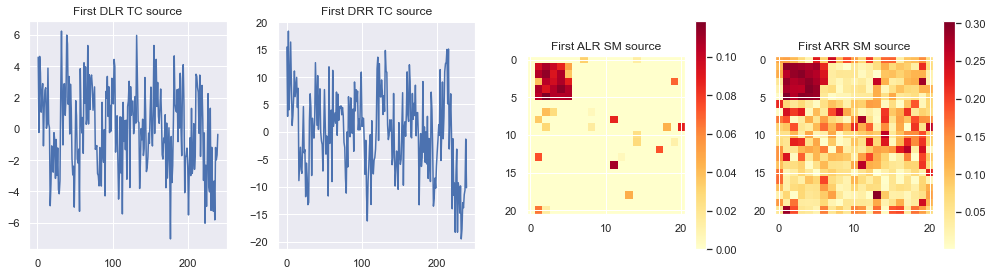

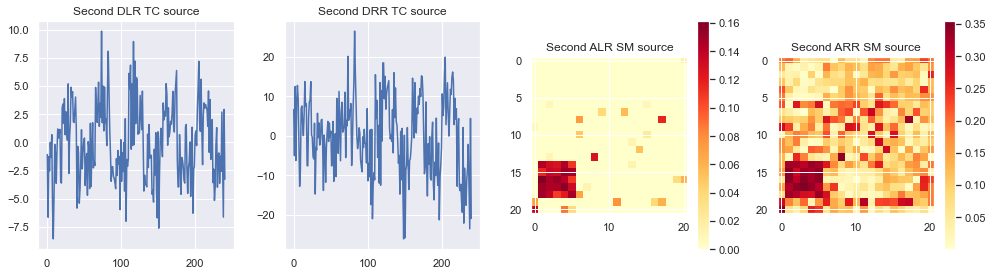

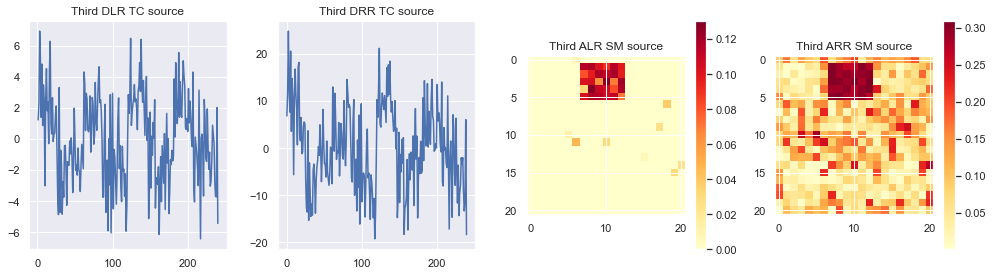

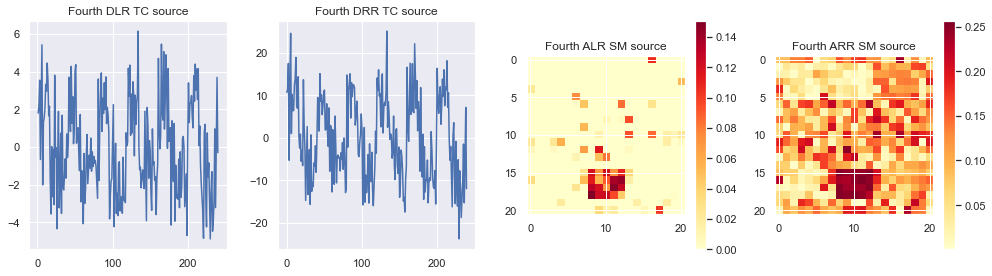

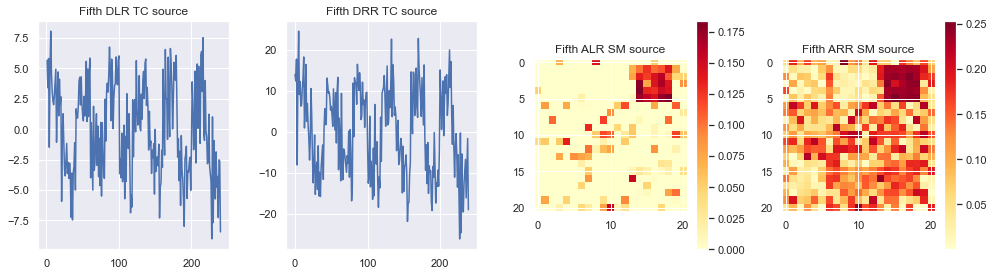

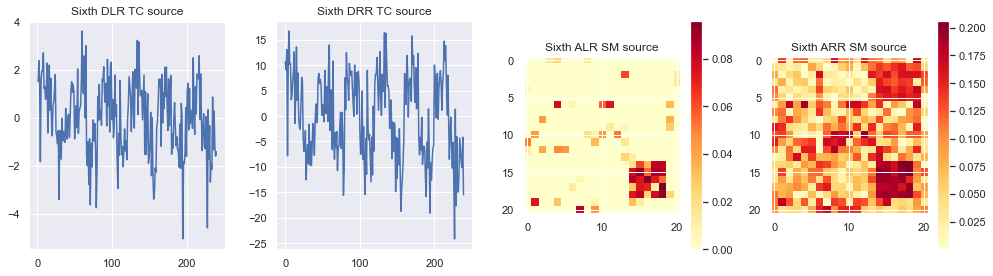

In [174]:
titles_ARR = ["First ARR SM source", "Second ARR SM source", "Third ARR SM source", 
              "Fourth ARR SM source", "Fifth ARR SM source", "Sixth ARR SM source"]

titles_DRR = ["First DRR TC source", "Second DRR TC source", "Third DRR TC source", 
              "Fourth DRR TC source", "Fifth DRR TC source", "Sixth DRR TC source"]

titles_ALR = ["First ALR SM source", "Second ALR SM source", "Third ALR SM source", 
              "Fourth ALR SM source", "Fifth ALR SM source", "Sixth ALR SM source"]

titles_DLR = ["First DLR TC source", "Second DLR TC source", "Third DLR TC source", 
              "Fourth DLR TC source", "Fifth DLR TC source", "Sixth DLR TC source"]


for i in range(6):
    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))
    
    ax[0].plot(df_Dlr.iloc[:, i]) 
    ax[0].title.set_text(titles_DLR[i])
    
    ax[1].plot(df_D_RR[i])
    ax[1].title.set_text(titles_DRR[i])
    
    c = ax[2].imshow(tpp1[i],cmap= "YlOrRd", interpolation='nearest') 
    fig.colorbar(c , ax = ax[2])
    ax[2].title.set_text(titles_ALR[i])
    
    d = ax[3].imshow(tpp2[i],cmap= "YlOrRd", interpolation='nearest')
    fig.colorbar(d , ax = ax[3])
    ax[3].title.set_text(titles_ARR[i])
    
    plt.savefig("2.4_24_plots{}.png".format(i), bbox_inches='tight')
    
    fig.tight_layout()

# Question 2.5 :

In [175]:
TC

array([[1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [176]:
TCs = TC

In [177]:
from sklearn.decomposition import PCA

In [178]:
pca = PCA(n_components=6)
pca.fit(TCs)

PCA(n_components=6)

In [179]:
print(pca.components_)

[[ 1.11462420e-01  1.26694571e-02  9.30640482e-02  5.43666344e-01
   6.04463091e-01  5.63742826e-01]
 [ 7.00506141e-01 -2.19244489e-02  6.89573160e-01 -7.67772401e-02
  -1.65543005e-01 -3.03277272e-04]
 [ 1.91541410e-01  9.39580715e-01 -1.51939503e-01  1.67586970e-01
  -2.42396715e-02 -1.69532889e-01]
 [-6.74859380e-01  2.64033245e-01  6.84954374e-01 -2.47081574e-02
  -2.61494089e-02  6.62909029e-02]
 [ 5.64009819e-02  2.16407379e-01 -1.11072618e-01 -7.38840614e-01
   8.88600955e-02  6.19570884e-01]
 [-3.95336632e-02  1.08386884e-03 -1.06031633e-01  3.52066504e-01
  -7.73338487e-01  5.14965989e-01]]


In [180]:
# eigen values
print(pca.explained_variance_)

[0.60767792 0.29447142 0.25666375 0.19507504 0.0778996  0.03351911]


In [181]:
eigen_val = pca.explained_variance_
#print(eigen_val)

In [182]:
eigen_vec = pca.components_
#print(eigen_vec)

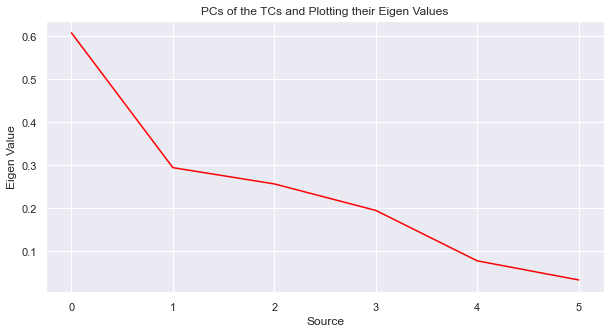

In [185]:
plt.figure(figsize=(10,5))
plt.plot(eigen_val, color="red")
plt.title("PCs of the TCs and Plotting their Eigen Values")
plt.xlabel("Source")
plt.ylabel("Eigen Value")

plt.savefig("2.5_plot_eigen_values.png".format(i), bbox_inches='tight')


In [186]:
Z = pca.transform(TCs)

In [187]:
print(Z)

[[ 0.97223298  0.64535582 -0.35484694 -0.06422355 -0.29768512 -0.04568082]
 [ 0.97223298  0.64535582 -0.35484694 -0.06422355 -0.29768512 -0.04568082]
 [ 0.97223298  0.64535582 -0.35484694 -0.06422355 -0.29768512 -0.04568082]
 ...
 [-0.94416575 -0.50209996 -0.36826326 -0.08975188 -0.21260385  0.00619047]
 [-0.94416575 -0.50209996 -0.36826326 -0.08975188 -0.21260385  0.00619047]
 [-0.94416575 -0.50209996 -0.36826326 -0.08975188 -0.21260385  0.00619047]]


In [188]:
# Create the pandas DataFrame
df_Z = pd.DataFrame(Z)
#df_Z

,0,1,2,3,4,5
0,0.972233,0.645356,-0.354847,-0.064224,-0.297685,-0.045681
1,0.972233,0.645356,-0.354847,-0.064224,-0.297685,-0.045681
2,0.972233,0.645356,-0.354847,-0.064224,-0.297685,-0.045681
3,0.972233,0.645356,-0.354847,-0.064224,-0.297685,-0.045681
4,0.972233,0.645356,-0.354847,-0.064224,-0.297685,-0.045681
...,...,...,...,...,...,...
235,-0.944166,-0.502100,-0.368263,-0.089752,-0.212604,0.006190
236,-0.944166,-0.502100,-0.368263,-0.089752,-0.212604,0.006190
237,-0.944166,-0.502100,-0.368263,-0.089752,-0.212604,0.006190
238,-0.944166,-0.502100,-0.368263,-0.089752,-0.212604,0.006190


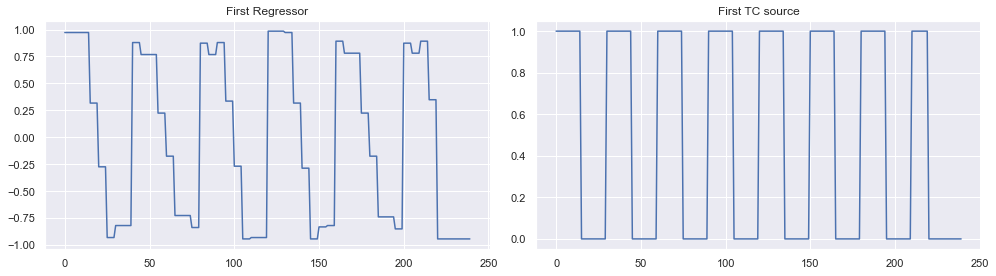

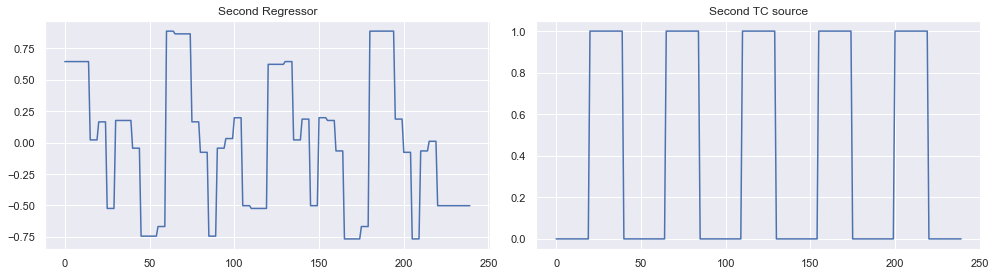

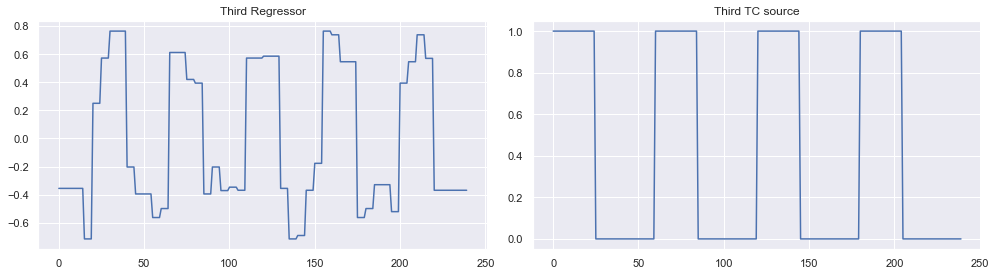

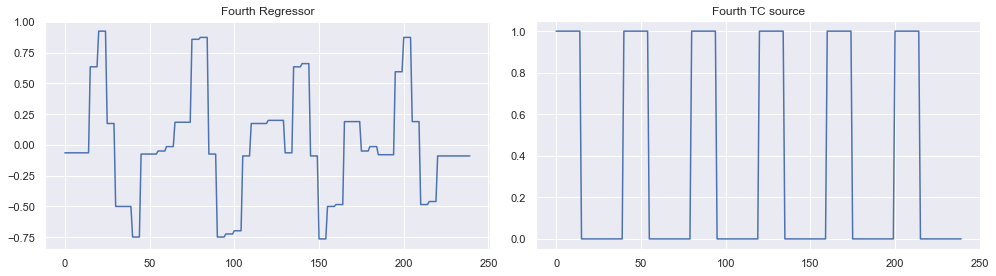

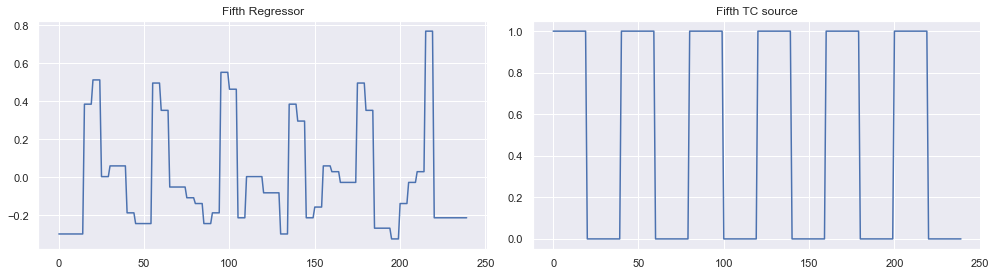

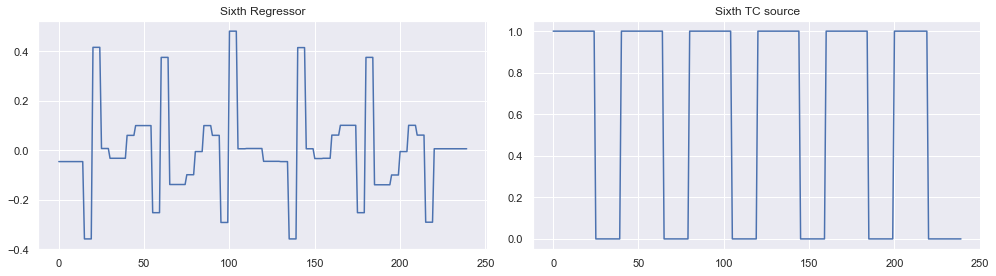

In [238]:
title_TCs = ["First TC source", "Second TC source", "Third TC source", "Fourth TC source", "Fifth TC source", "Sixth TC source"]

title_Regressors = ["First Regressor", "Second Regressor", "Third Regressor", "Fourth Regressor", "Fifth Regressor", "Sixth Regressor"]

for i in range(6):   
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
    
    ax[0].plot(df_Z[i]) 
    
    ax[0].title.set_text(title_Regressors[i])
    
    ax[1].plot(interval, df[i])
    
    ax[1].title.set_text(title_TCs[i])
    
    plt.savefig("2.5_Z_TCs_plots{}.png".format(i), bbox_inches='tight')

    fig.tight_layout()

In [191]:
# writing to csv for running LR in R
df_Z.to_csv('Z.csv',index=False, header=None)

In [192]:
# reading estimates of APCR
APCR = pd.read_csv('APCR.csv', index_col = None, header=None)

# reading estimates of DPCR
DPCR = pd.read_csv('DPCR.csv', index_col = None, header=None)

In [193]:
APCR = APCR.drop(APCR.columns[0], axis = 1)
APCR = APCR.drop(0)
APCR

,1,2,3,4,5,6,7,8,9,10,...,432,433,434,435,436,437,438,439,440,441
1,0.0763105512214167,0.277153599479745,0.600201903308877,0.390282905488343,0.862256365397254,0.0234184786087552,0.294172987237349,0.595021123844104,0.553840478460729,0.562809434381111,...,0.489046050087361,0.561027929977103,0.272934162366178,0.10652603389861,0.610612509215933,0.411732225101911,0.0630961295658319,0.0442887944505501,0.161947151496991,0.503617590132867
2,0.582010095866129,0.612891604875372,0.581360639231953,0.191771602322704,0.380652445436935,0.446002011930829,0.712499218672066,0.210102195999486,0.826678119281913,0.202506290306577,...,0.164359007768342,0.158477062488071,0.0742433866198884,0.881854639357671,0.557498291717359,0.202991556615222,0.0394015648710003,0.182627038374209,0.275722610377443,0.360106716942731
3,0.551133973608351,0.660577628863854,0.0794946387545294,0.54290935583898,0.537948207789428,0.907212712433983,0.749629379101768,0.420451976758435,0.0374710616648127,1.13919257559198,...,0.810775091217818,0.416152552079588,0.152001651522848,0.848990798551113,0.0866273452117016,1.16830797820324,0.690260045175498,0.985846507691292,0.864824299291486,0.00708677385974372
4,0.304025505370438,0.0762782581214889,0.238905972384579,0.508859592586917,0.0973203523194631,0.271728610318614,0.714151786684686,0.161638899263315,0.307126151281622,0.413982022134885,...,0.294870339414494,0.11840632453926,0.514253089552414,0.434549797291598,0.685075318222407,0.162014656662237,0.820909954427463,0.820007985111301,0.856878487237375,0.0102508151214052
5,0.789768340085686,0.860041009583174,0.84966401185997,0.163915626930556,0.460583297434663,0.597161129716478,0.452801873088293,0.999439103031601,0.161129984973535,0.00463744293472176,...,0.553394966649902,0.419344616530989,1.07441946109994,0.274993978648495,0.56856440145635,0.421775126432439,0.626196314557081,0.129407526198624,0.614457728583452,0.528967128502481
6,0.489461311347303,0.0718280526929664,0.513761848394708,0.144726315561775,0.134876756848915,0.212239973902014,0.421139863549231,0.632845549753365,0.0351683585113259,0.0370798364696628,...,0.404370697284581,0.567247886150086,0.119145929825773,0.242547913754521,0.257080841517085,0.299386125599474,0.172158370526454,0.176923436415862,0.11281916383739,0.546705691433111


In [194]:
DPCR = DPCR.drop(DPCR.columns[0], axis = 1)
DPCR = DPCR.drop(0)
DPCR

,1,2,3,4,5,6
1,60.7747160313773,52.7731465982379,29.9863581460405,44.0800803583817,41.3947574985554,40.7664079472468
2,60.8081222216839,35.52339382133,-26.7168782285529,-0.111001132614512,43.5345359325036,26.6664254444976
3,86.0137241250423,100.39006438984,57.382479014155,98.3227206150344,69.481997583692,64.2317912612932
4,-31.217342189059,51.0085830758563,-12.3034392435319,53.7367431379238,-23.7462594691533,-4.93493662591407
5,64.2172788523608,32.8173684568305,32.3892478689676,28.8759057259511,47.8135280511827,40.4644271353956
...,...,...,...,...,...,...
236,-27.1175740380102,-63.248935836167,-11.6270435099983,-50.545458224417,-17.1605627858593,-23.6407034657848
237,-70.8003012756404,-48.3212534127172,-54.3431750452563,-64.8480880030682,-46.4157949438197,-62.0490349805276
238,-38.770886501472,-43.4091583858477,-94.5981144062446,-74.2677264757469,-42.149056994157,-38.8419887286163
239,3.73098235127356,4.62791375766431,29.5440004688313,25.8740217719023,12.2142570540965,5.5135434973929


In [195]:
DPCR = DPCR.apply(pd.to_numeric)
APCR = APCR.apply(pd.to_numeric)

In [196]:
# string as dataframes
df_DPCR = DPCR
df_APCR = APCR

DPCR = np.array(DPCR)
APCR = np.array(APCR)

In [197]:
tpp = APCR.reshape((APCR.shape[0], 21,21), order='F')
#tpp

array([[[0.07631055, 0.4426707 , 0.62701076, ..., 0.44707259,
         0.48329837, 0.51371185],
        [0.2771536 , 0.031019  , 0.2067164 , ..., 0.88761419,
         0.74138289, 0.4788612 ],
        [0.6002019 , 0.32676488, 0.0738762 , ..., 0.73510572,
         0.67099156, 0.81282513],
        ...,
        [0.16336383, 0.04229631, 0.        , ..., 0.94849349,
         0.95048114, 0.04428879],
        [0.31129181, 0.9188577 , 0.51843302, ..., 0.55661738,
         0.53847885, 0.16194715],
        [0.17942545, 0.1367222 , 0.32819274, ..., 0.33622427,
         0.01949943, 0.50361759]],

       [[0.5820101 , 0.8430001 , 0.32174843, ..., 0.07802293,
         0.20708228, 0.22914521],
        [0.6128916 , 0.89509857, 0.86714217, ..., 0.14190496,
         0.71533309, 0.01457551],
        [0.58136064, 0.86756097, 1.02928929, ..., 0.36236581,
         0.6575347 , 0.35218184],
        ...,
        [0.44537556, 0.27272643, 0.25206333, ..., 0.11185692,
         0.32977182, 0.18262704],
        [0.3

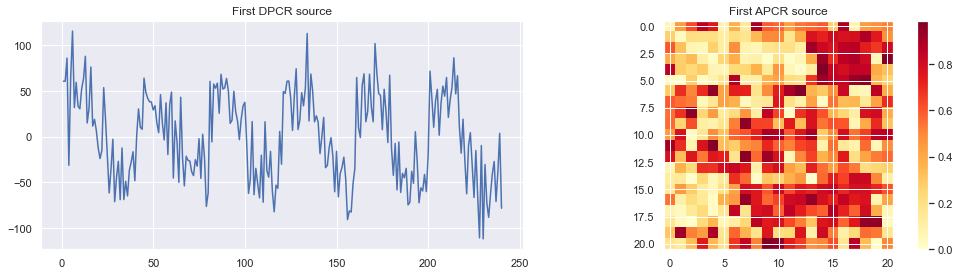

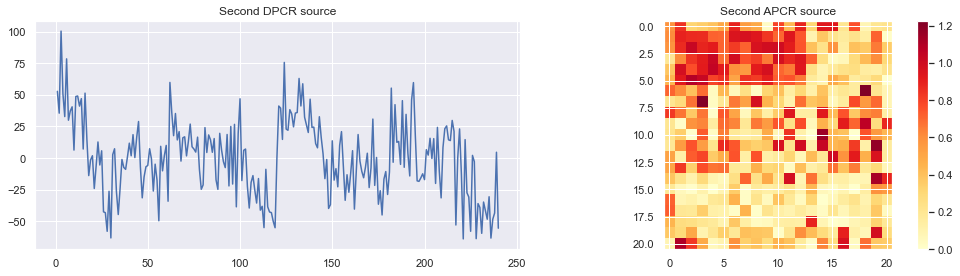

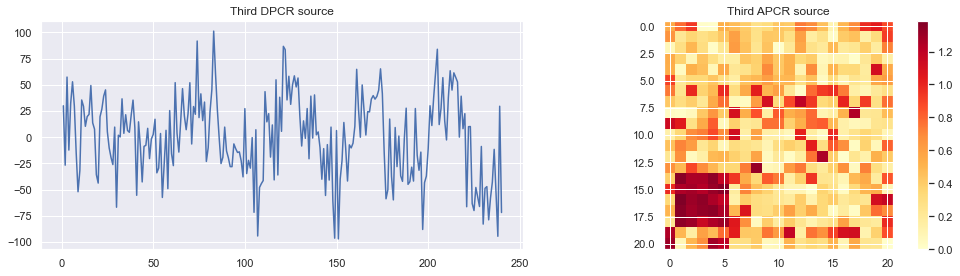

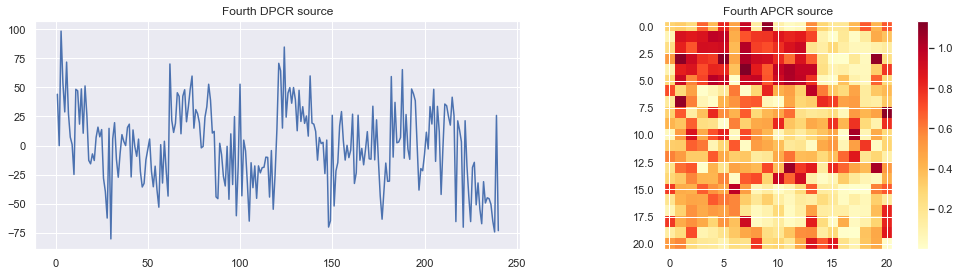

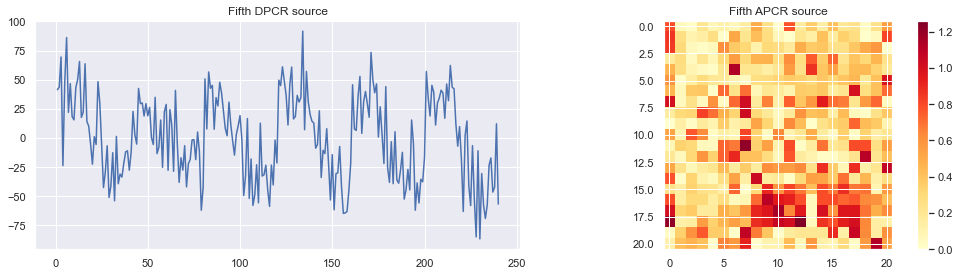

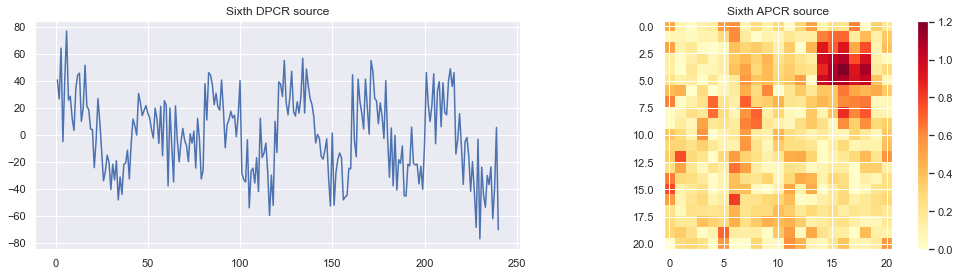

In [200]:
title_APCR = ["First APCR source", "Second APCR source", "Third APCR source", "Fourth APCR source", "Fifth APCR source", "Sixth APCR source"]

title_DPCR = ["First DPCR source", "Second DPCR source", "Third DPCR source", "Fourth DPCR source", "Fifth DPCR source", "Sixth DPCR source"]

for i in range(6):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
    
    ax[0].plot(df_DPCR.iloc[:, i]) 
    
    ax[0].title.set_text(title_DPCR[i])
    
    c = ax[1].imshow(tpp[i],cmap= "YlOrRd", interpolation='nearest') 
    
    fig.colorbar(c , ax = ax[1])
    
    ax[1].title.set_text(title_APCR[i])
    
    fig.tight_layout()
    
    plt.savefig("2.5_APCR_DPCR_plots{}.png".format(i), bbox_inches='tight')